# **Platemon monitoring data analysis**

In [1]:
from src.plot import plot_single_bath, plot_all_params, save_individual_run, save_bath
from src.load_data import load_sheet, clean_sheet

%load_ext autoreload
%matplotlib
%autoreload 2

Using matplotlib backend: module://matplotlib_inline.backend_inline


# **Load data from Google sheets**

In [2]:
internal_df, sheet1 = load_sheet("Electroplate Experiments Data JUN_JUL", "vary_internal_table")
internal_df = clean_sheet(internal_df)
two_side_plate, sheet2 = load_sheet("Electroplate Experiments Data JUN_JUL", "2 side Experimental Result")
two_side_plate = clean_sheet(two_side_plate)
august_df, sheet3 = load_sheet("Electroplating Experiments Data August", "Sheet1")
august_df = clean_sheet(august_df)
september_df, sheet4 = load_sheet("Electroplating Experiments Data September", "Sheet1")
september_df =clean_sheet(september_df)

In [3]:
september_df

run_id  mass_SLS  mass_NISO4  mass_NICL2  time_total  conductivity  \
0     SEPT_24_1      40.0       270.0        40.0           2         57.12   
1     SEPT_24_1      40.0       270.0        40.0           4         57.12   
2     SEPT_24_1      40.0       270.0        40.0           6         57.06   
3     SEPT_24_1      40.0       270.0        40.0           8         57.12   
4     SEPT_24_1      40.0       270.0        40.0          10         57.07   
...         ...       ...         ...         ...         ...           ...   
4780  SEPT_25_6      40.0       270.0        40.0        7152         61.38   
4781  SEPT_25_6      40.0       270.0        40.0        7154         61.44   
4782  SEPT_25_6      40.0       270.0        40.0        7156         61.64   
4783  SEPT_25_6      40.0       270.0        40.0        7158         61.93   
4784  SEPT_25_6      40.0       270.0        40.0        7160         61.64   

      temperature    pH  voltage  current  amp_hour bath_id  
0           50.01  4.06    4.653    2.676     0.001  Bath_7  
1           50.01  4.06    4.586    2.676     0.003  Bath_7  
2           50.01  4.06    4.554    2.677     0.004  Bath_7  
3           50.01  4.06    4.431    2.677     0.006  Bath_7  
4           50.00  4.06    4.374    2.677     0.007  Bath_7  
...           ...   ...      ...      ...       ...     ...  
4780        49.41  1.43    3.050    2.678     5.319  Bath_8  
4781        49.41  1.42    3.049    2.678     5.321  Bath_8  
4782        49.38  1.42    3.050    2.678     5.322  Bath_8  
4783        49.39  1.42    3.049    2.678     5.324  Bath_8  
4784        49.39  1.42    3.047    2.678     5.325  Bath_8  

[4785 rows x 12 columns]

In [4]:
august_df

run_id  mass_SLS  mass_NISO4  mass_NICL2  time_total  conductivity  \
0     AUG_6_1     0.525       364.5        54.0           2         54.32   
1     AUG_6_1     0.525       364.5        54.0           4         54.32   
2     AUG_6_1     0.525       364.5        54.0           6         54.30   
3     AUG_6_1     0.525       364.5        54.0           8         54.52   
4     AUG_6_1     0.525       364.5        54.0          10         54.45   
...       ...       ...         ...         ...         ...           ...   
4786  AUG_7_6     0.525       364.5        54.0        3588         51.85   
4787  AUG_7_6     0.525       364.5        54.0        3590         51.85   
4788  AUG_7_6     0.525       364.5        54.0        3592         51.85   
4789  AUG_7_6     0.525       364.5        54.0        3594         51.85   
4790  AUG_7_6     0.525       364.5        54.0        3596         51.85   

      temperature    pH  voltage  current  amp_hour bath_id  
0           49.67  4.01    3.105    2.342     0.001   Fresh  
1           49.68  4.01    3.668    2.342     0.003   Fresh  
2           49.68  4.02    3.597    2.342     0.004   Fresh  
3           49.68  4.02    3.563    2.342     0.005   Fresh  
4           49.68  4.02    3.542    2.342     0.007   Fresh  
...           ...   ...      ...      ...       ...     ...  
4786        50.42  4.12    3.652    2.343     2.335  Bath_6  
4787        50.42  4.12    3.644    2.343     2.337  Bath_6  
4788        50.42  4.12    3.666    2.343     2.338  Bath_6  
4789        50.42  4.12    3.575    2.343     2.339  Bath_6  
4790        50.42  4.12    3.582    2.343     2.341  Bath_6  

[4791 rows x 12 columns]

In [5]:
import pandas as pd

combined_df = pd.concat([internal_df, august_df, september_df])

In [6]:
combined_df

run_id  mass_SLS  mass_NISO4  mass_NICL2  time_total  conductivity  \
0       JUL_3_1       0.8       270.0        40.0           1         55.37   
1       JUL_3_1       0.8       270.0        40.0           2         55.37   
2       JUL_3_1       0.8       270.0        40.0           3         55.37   
3       JUL_3_1       0.8       270.0        40.0           4         55.45   
4       JUL_3_1       0.8       270.0        40.0           5         55.45   
...         ...       ...         ...         ...         ...           ...   
4780  SEPT_25_6      40.0       270.0        40.0        7152         61.38   
4781  SEPT_25_6      40.0       270.0        40.0        7154         61.44   
4782  SEPT_25_6      40.0       270.0        40.0        7156         61.64   
4783  SEPT_25_6      40.0       270.0        40.0        7158         61.93   
4784  SEPT_25_6      40.0       270.0        40.0        7160         61.64   

      temperature    pH  voltage  current  amp_hour bath_id  
0           50.36  4.02    3.649    2.342     0.001   Fresh  
1           50.35  4.02    3.568    2.342     0.001   Fresh  
2           50.35  4.02    3.509    2.342     0.002   Fresh  
3           50.35  4.02    3.509    2.342     0.003   Fresh  
4           50.35  4.02    3.475    2.342     0.003   Fresh  
...           ...   ...      ...      ...       ...     ...  
4780        49.41  1.43    3.050    2.678     5.319  Bath_8  
4781        49.41  1.42    3.049    2.678     5.321  Bath_8  
4782        49.38  1.42    3.050    2.678     5.322  Bath_8  
4783        49.39  1.42    3.049    2.678     5.324  Bath_8  
4784        49.39  1.42    3.047    2.678     5.325  Bath_8  

[64568 rows x 12 columns]

In [7]:
internal_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54992 entries, 0 to 54991
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   run_id        54992 non-null  object 
 1   mass_SLS      54992 non-null  float64
 2   mass_NISO4    54992 non-null  float64
 3   mass_NICL2    54992 non-null  float64
 4   time_total    54992 non-null  int64  
 5   conductivity  54992 non-null  float64
 6   temperature   54992 non-null  float64
 7   pH            54992 non-null  float64
 8   voltage       54992 non-null  float64
 9   current       54992 non-null  float64
 10  amp_hour      54992 non-null  float64
 11  bath_id       54992 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 5.0+ MB


In [8]:
two_side_plate.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 22953 entries, 2 to 24156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   run_id        22953 non-null  object 
 1   time_total    22953 non-null  int64  
 2   conductivity  22953 non-null  float64
 3   temperature   22953 non-null  float64
 4   pH            22953 non-null  float64
 5   voltage       22953 non-null  float64
 6   current       22953 non-null  float64
 7   amp_hour      22953 non-null  float64
 8   bath_id       22953 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.8+ MB


## 
---

# **Parameters constant**

Be able to vary limit of y-axis within the "PARAMS" dictionary (For "PARAMETERS" still fix at 5)

In [9]:
PARAMS = {
	# Default P' TJ
	# 'pH': [2, 5],
	# 'voltage': [0, 5],
	# Need to change due to the platinum anode cause lower pH and higher voltage
	'pH': [0, 5],
	'voltage': [0, 6],
	'current': [1, 4],
	# 'conductivity': [48, 70],
	'conductivity': [0, 70],
	'temperature': [45, 54]
}

In [10]:
# PARAMETERS = ['pH' ,'voltage', 'current', 'conductivity', 'temperature']

In [11]:
# Y_LIM = [[0, 5], [0, 5], [0, 3], [40, 80], [40, 80]]
# OLD_BATH = ['18.1', '18.2', '18.3', '18.4', '18.5', '19.1', '19.2']
# for param, y_pos in zip(PARAMETERS, Y_LIM):
# 	plot_single_bath(two_side_plate, OLD_BATH, param, y_pos)

In [12]:
# for param, y_pos in zip(PARAMETERS, Y_LIM):
# 	plot_single_bath(internal_df, full_bath_1, param, y_pos)

In [13]:
# BATH_1 = ['17.1']
# BATH_2 = ['18.1', '18.2', '18.3', '18.4', '18.5', '19.1', '19.2']
# BATH_3 = ['24.1', '24.2', '24.3', 'JUL_1_4', 'JUL_1_5']
# BATH_4 = ['30.1', '30.2', 'JUL_1_1', 'JUL_1_2', 'JUL_1_3']
# BATH_5 = ['JUL_2_1', 'JUL_2_2']
# BATH_IDS = [BATH_1, BATH_2, BATH_3, BATH_4, BATH_5]

# ALL_TWO_PLATE_BATH = BATH_1 + BATH_2 + BATH_3 + BATH_4 + BATH_5
# FRESH_BATH = ['17.1', '18.1', '24.1', '30.1', 'JUL_2_1']
# SAME_CONDITION = ['17.1', 'JUL_2_1']

In [14]:
### SLS variation ###
# SLS_PLATE = ['JUL_3_2', 'JUL_3_3', 'JUL_3_4', 'JUL_22_1']
# plot_all_params(internal_df, SLS_PLATE, PARAMS)

## 
---

# Baths monitoring data in real-time

- All time series, which were gathered pH, conductivity, temperature, volage, and current from laboratory experiments

- Data were pulled from the 'vary_internal_table' in the Google Sheet. 

- Done record 3 main baths.

- We plotting to see how it change during the time passes.

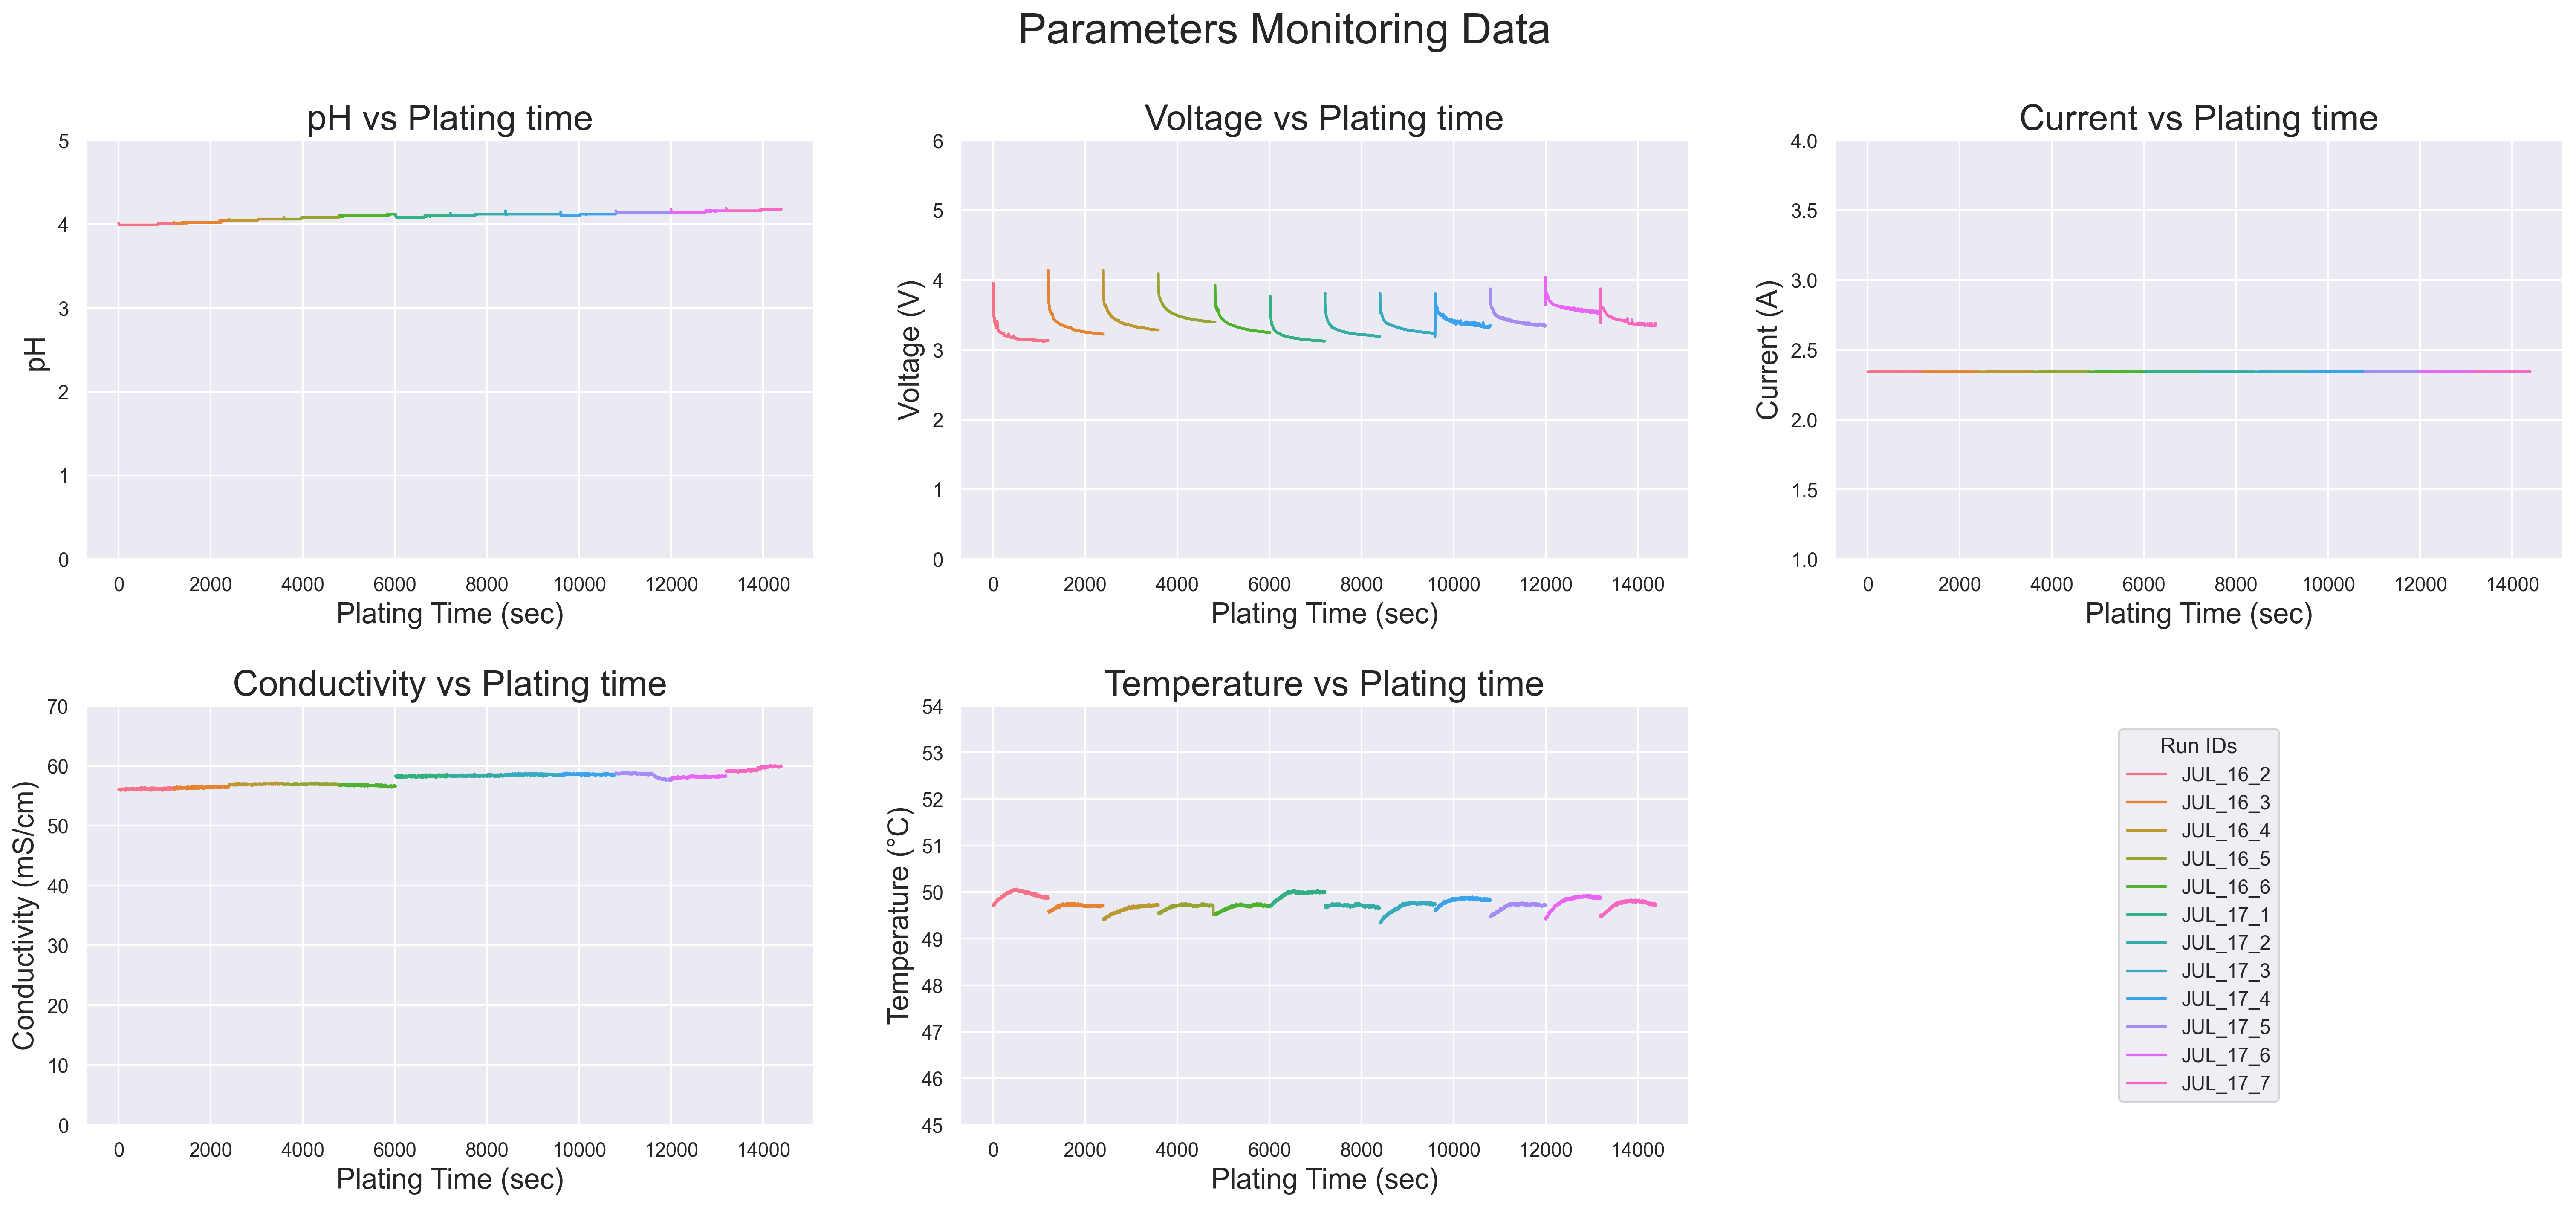

In [15]:
condition = (internal_df['bath_id'] == 'Bath_1')
full_bath_1 = list(internal_df[condition]['run_id'].unique())
plot_all_params(internal_df, full_bath_1, PARAMS)

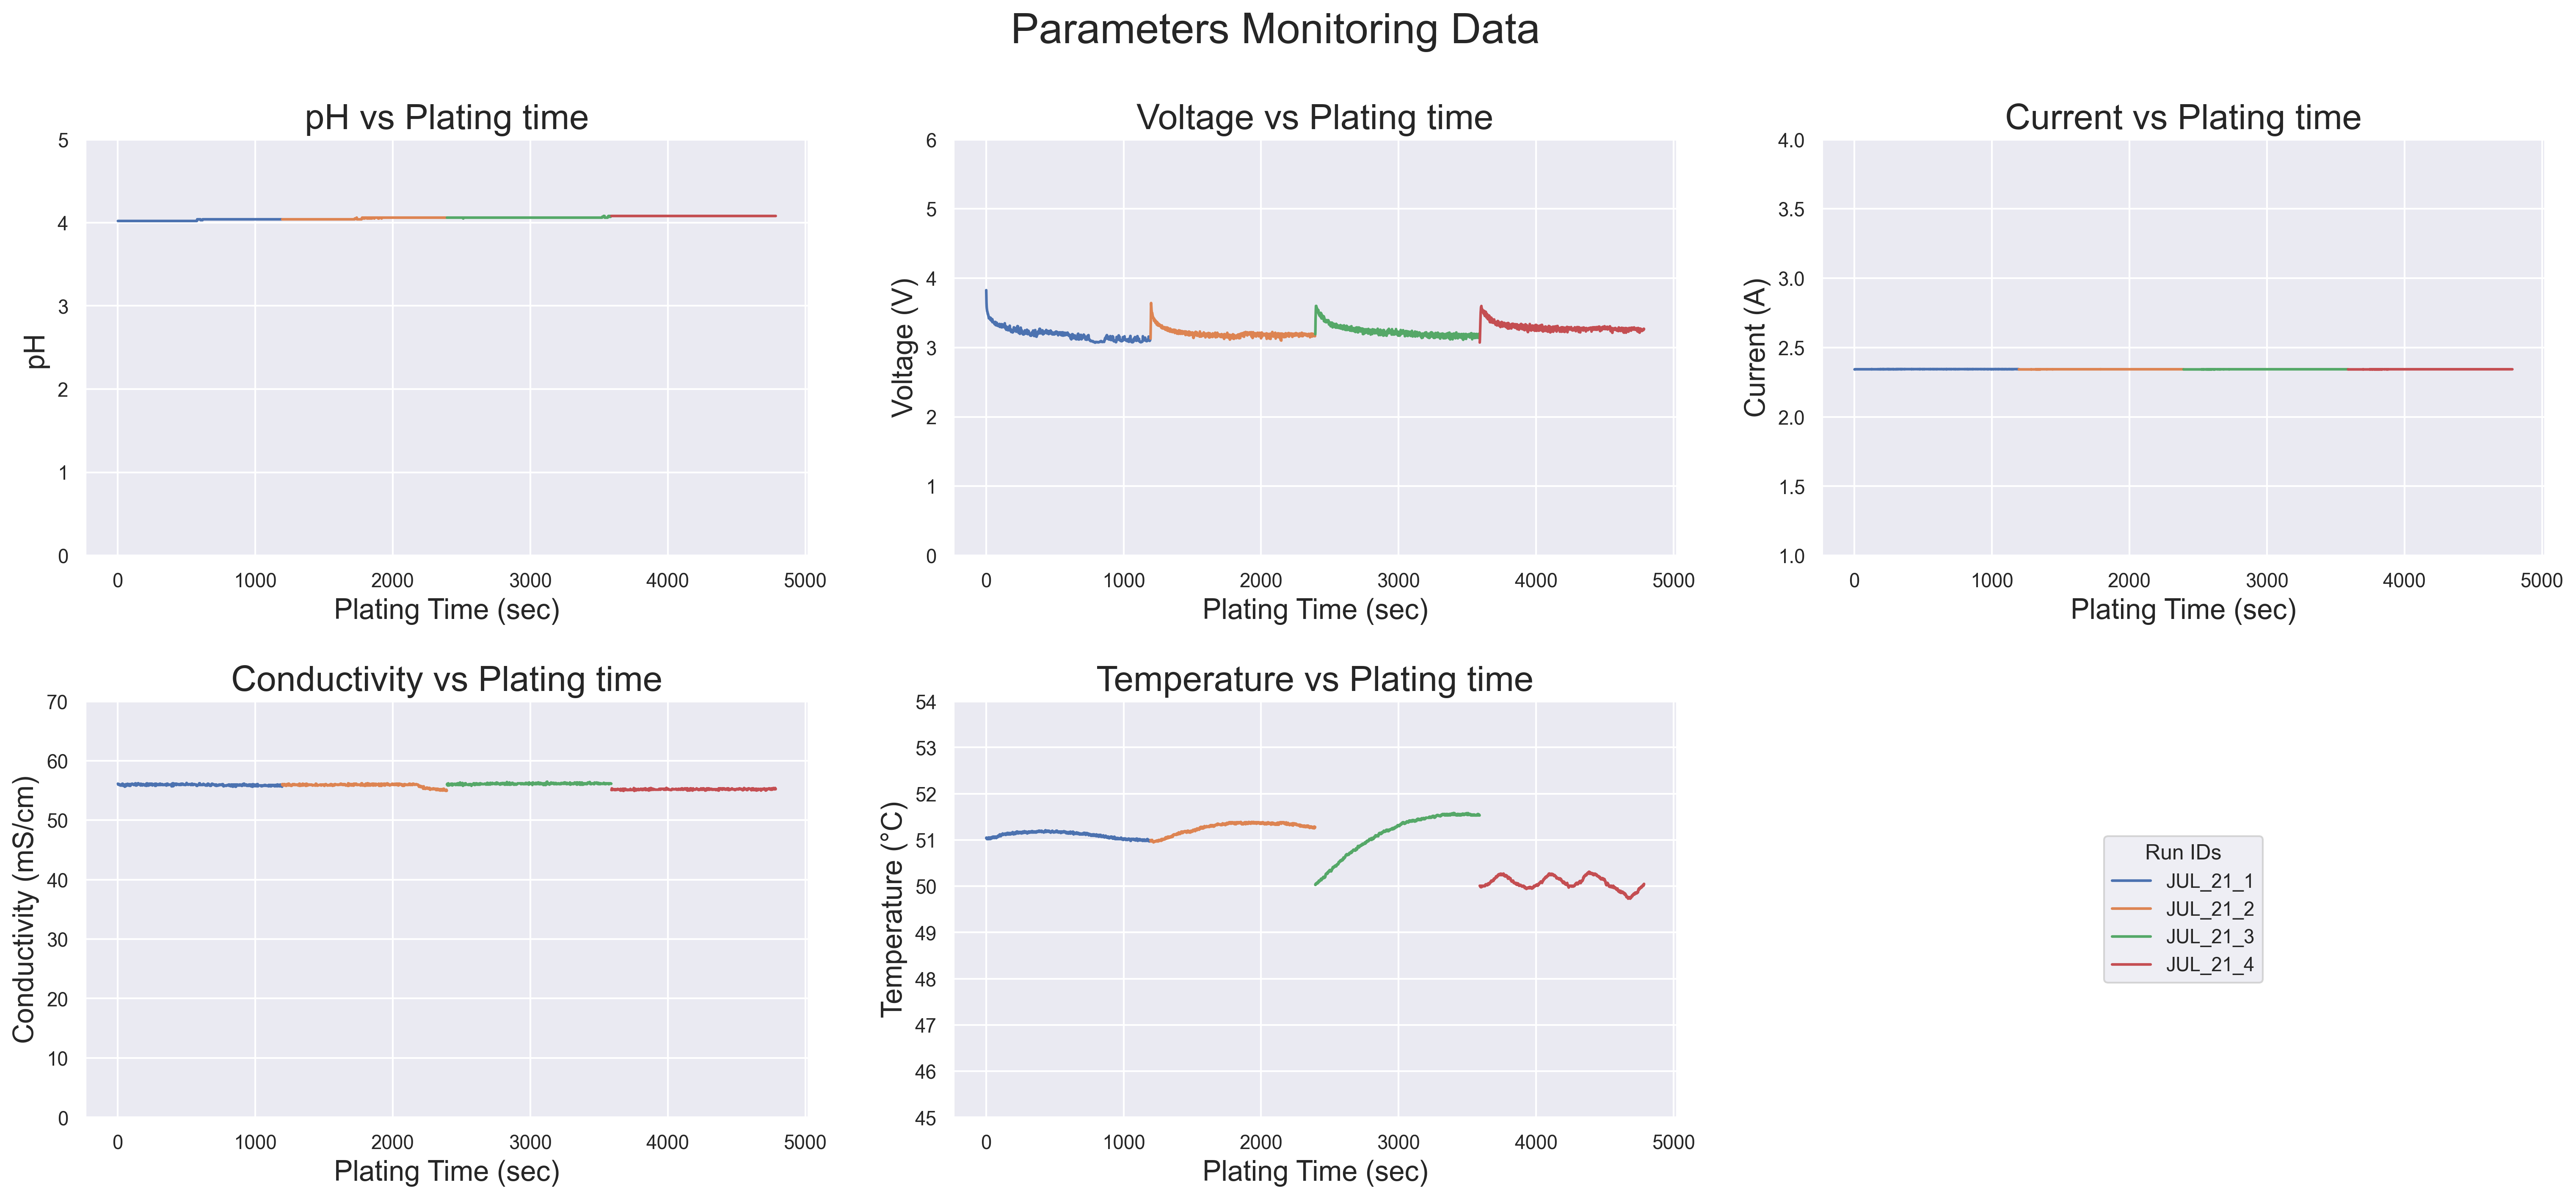

In [16]:
condition = (internal_df['bath_id'] == 'Bath_2')
full_bath_2 = list(internal_df[condition]['run_id'].unique())
plot_all_params(internal_df, full_bath_2, PARAMS)

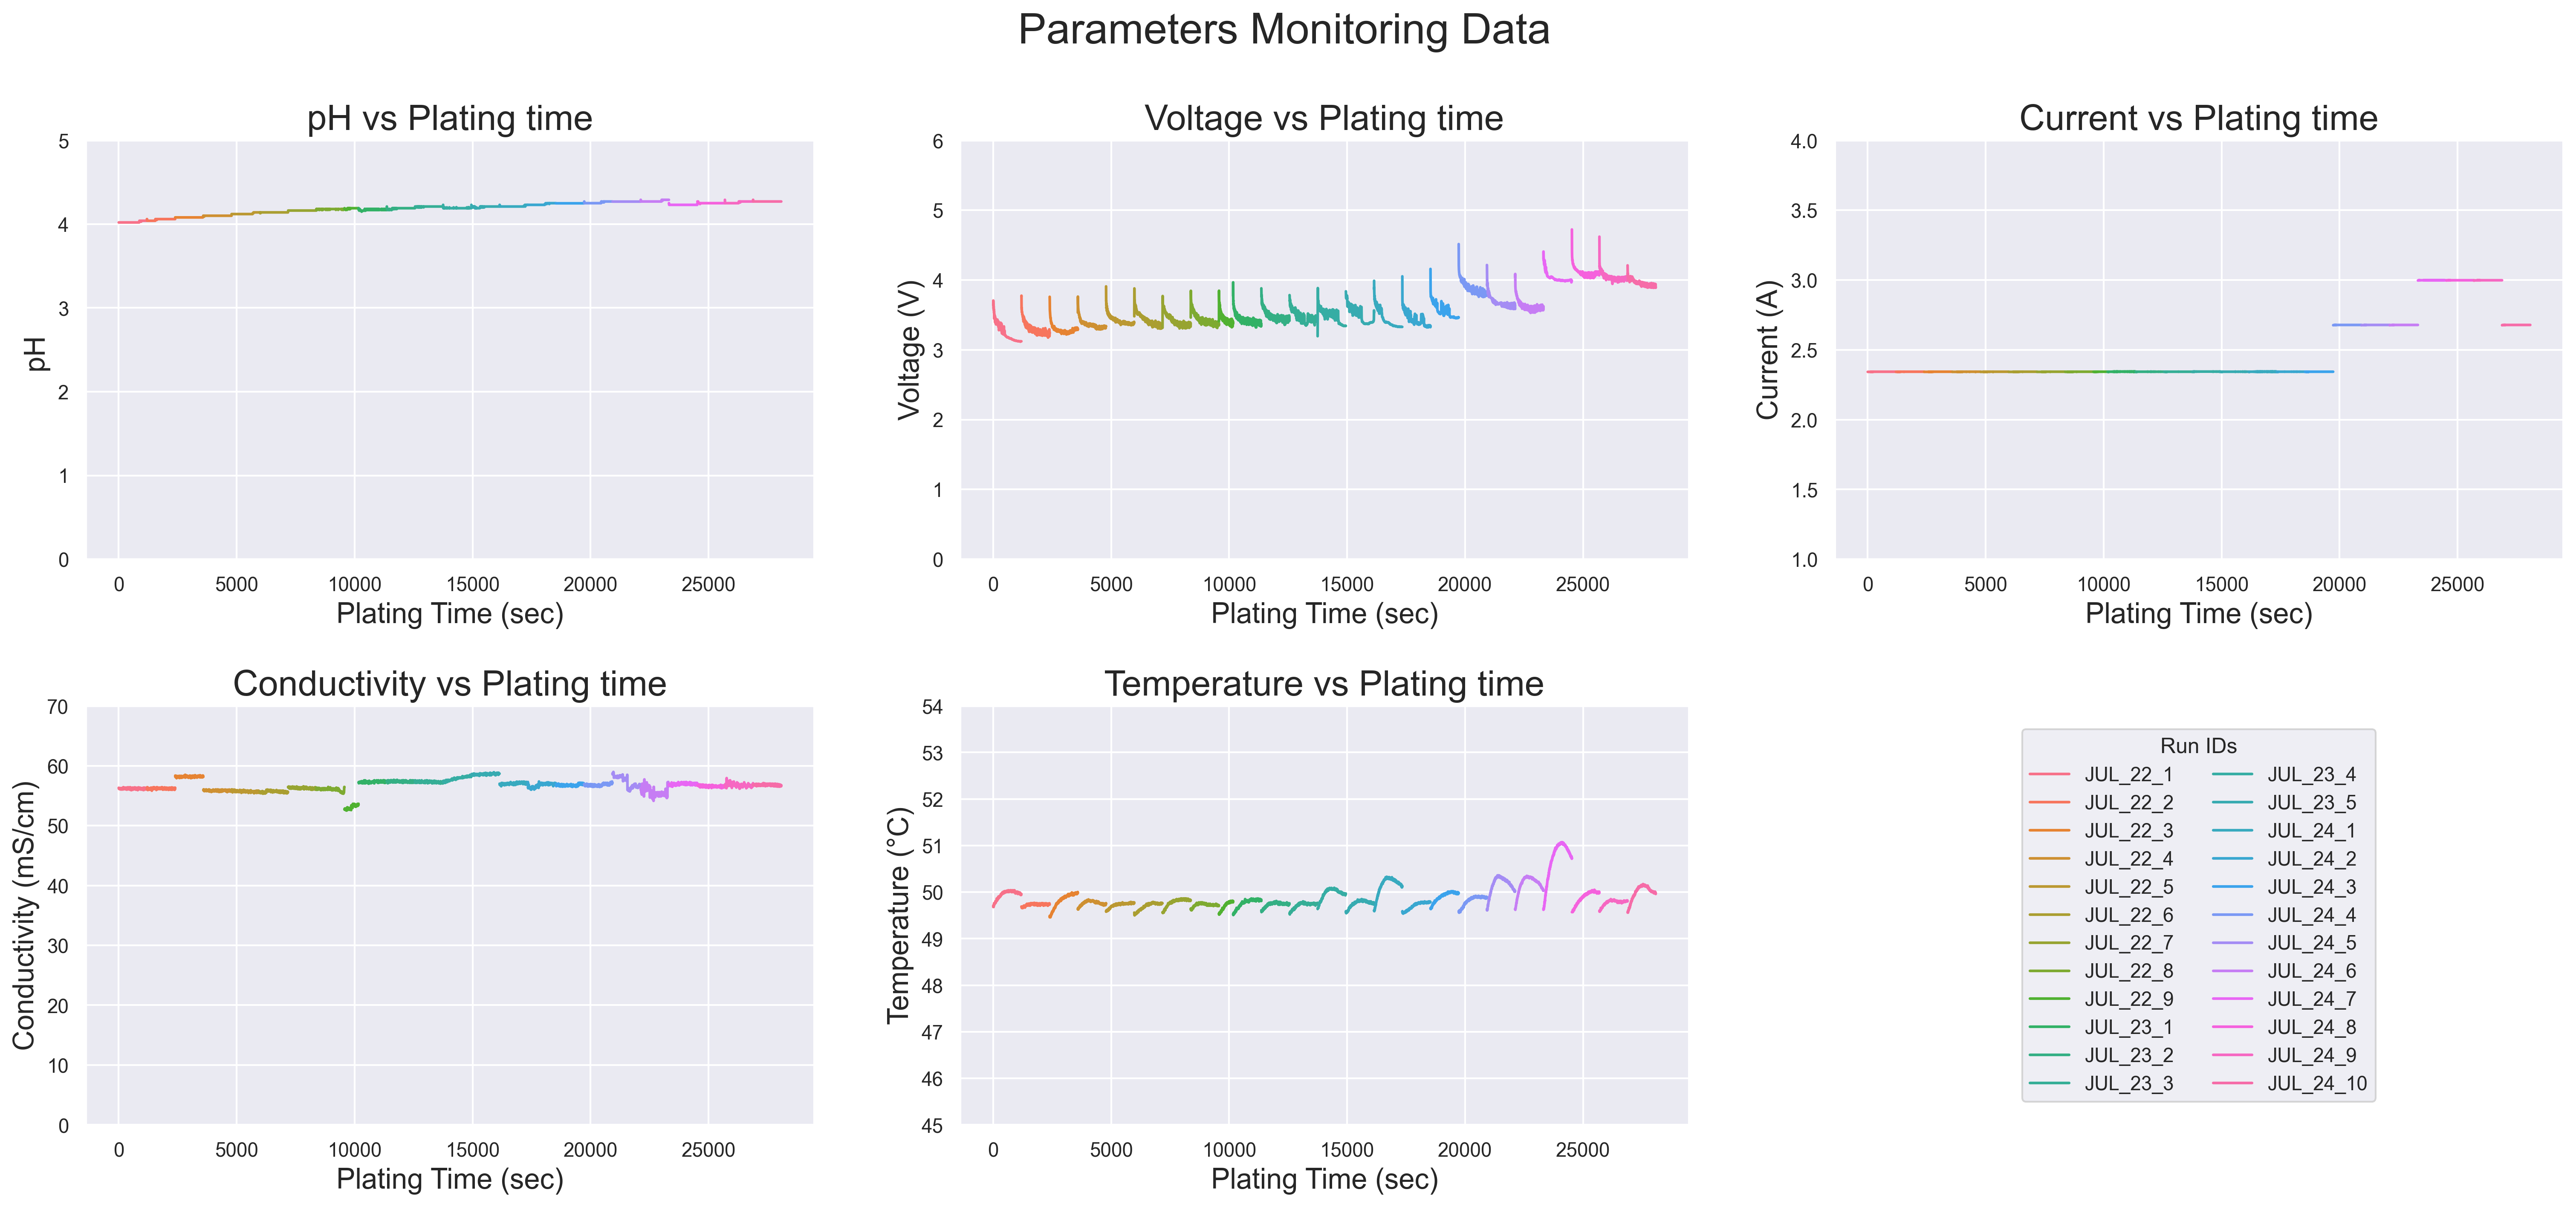

In [17]:
condition = (internal_df['bath_id'] == 'Bath_3')
full_bath_3 = list(internal_df[condition]['run_id'].unique())
plot_all_params(internal_df, full_bath_3, PARAMS)

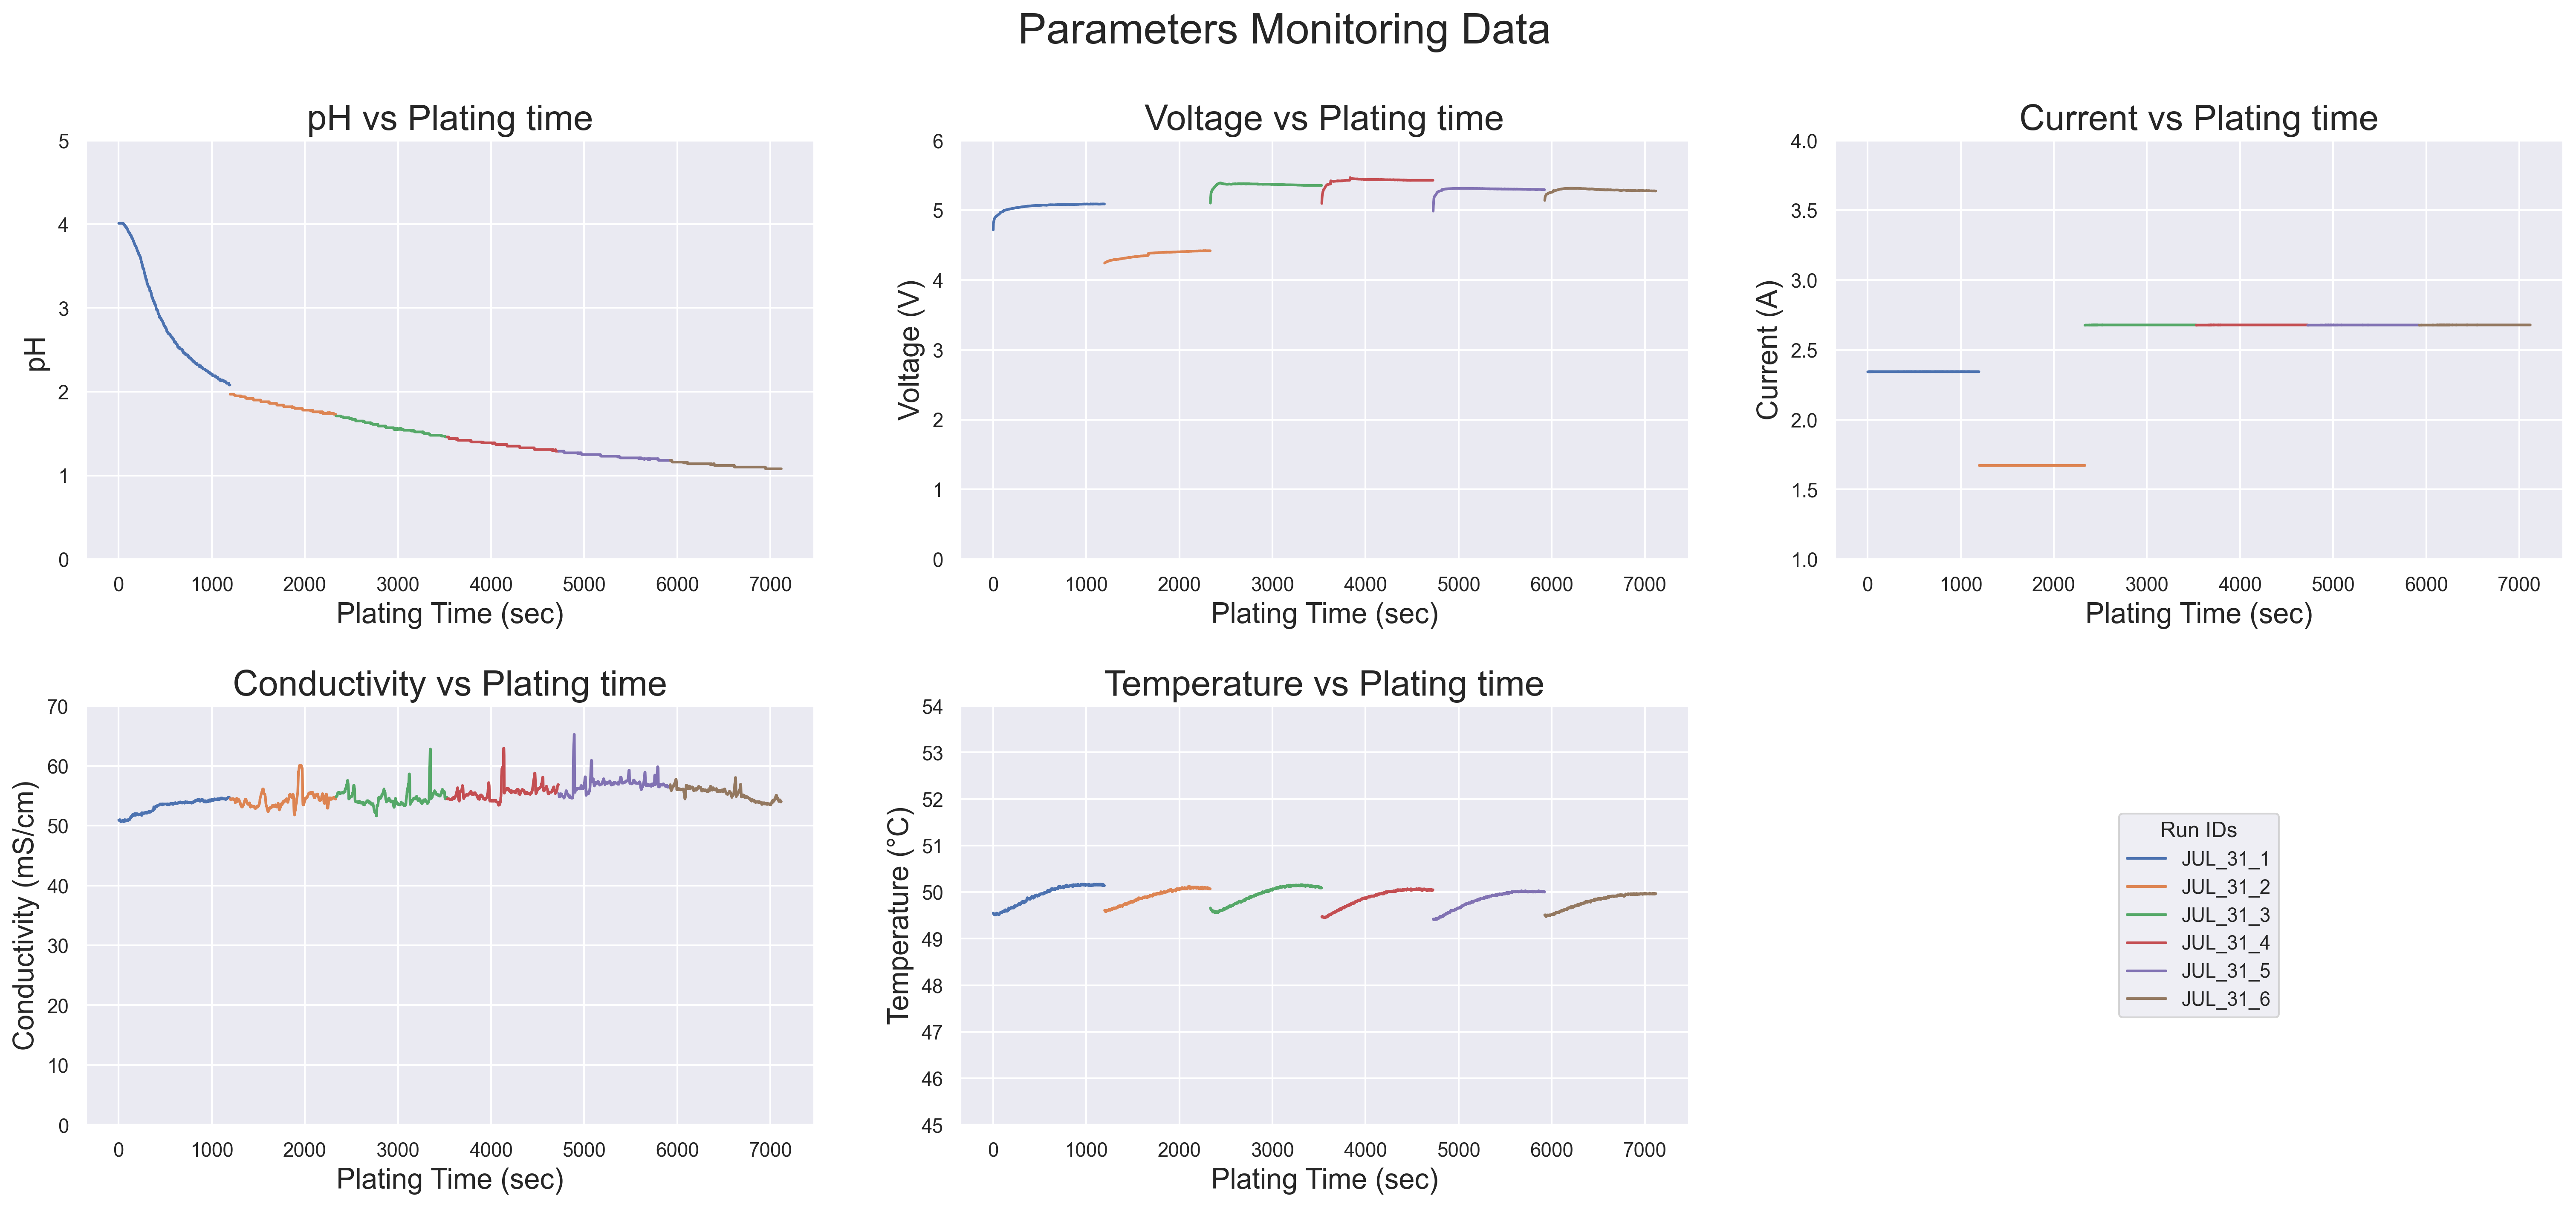

In [18]:
condition = (internal_df['bath_id'] == 'Bath_4')
full_bath_3 = list(internal_df[condition]['run_id'].unique())
plot_all_params(internal_df, full_bath_3, PARAMS)

# **Finding trend of current density and agitation rate from 24 July experiment**

## Comparison the agitation rate [100 rpm, 300 rpm, 600 rpm]

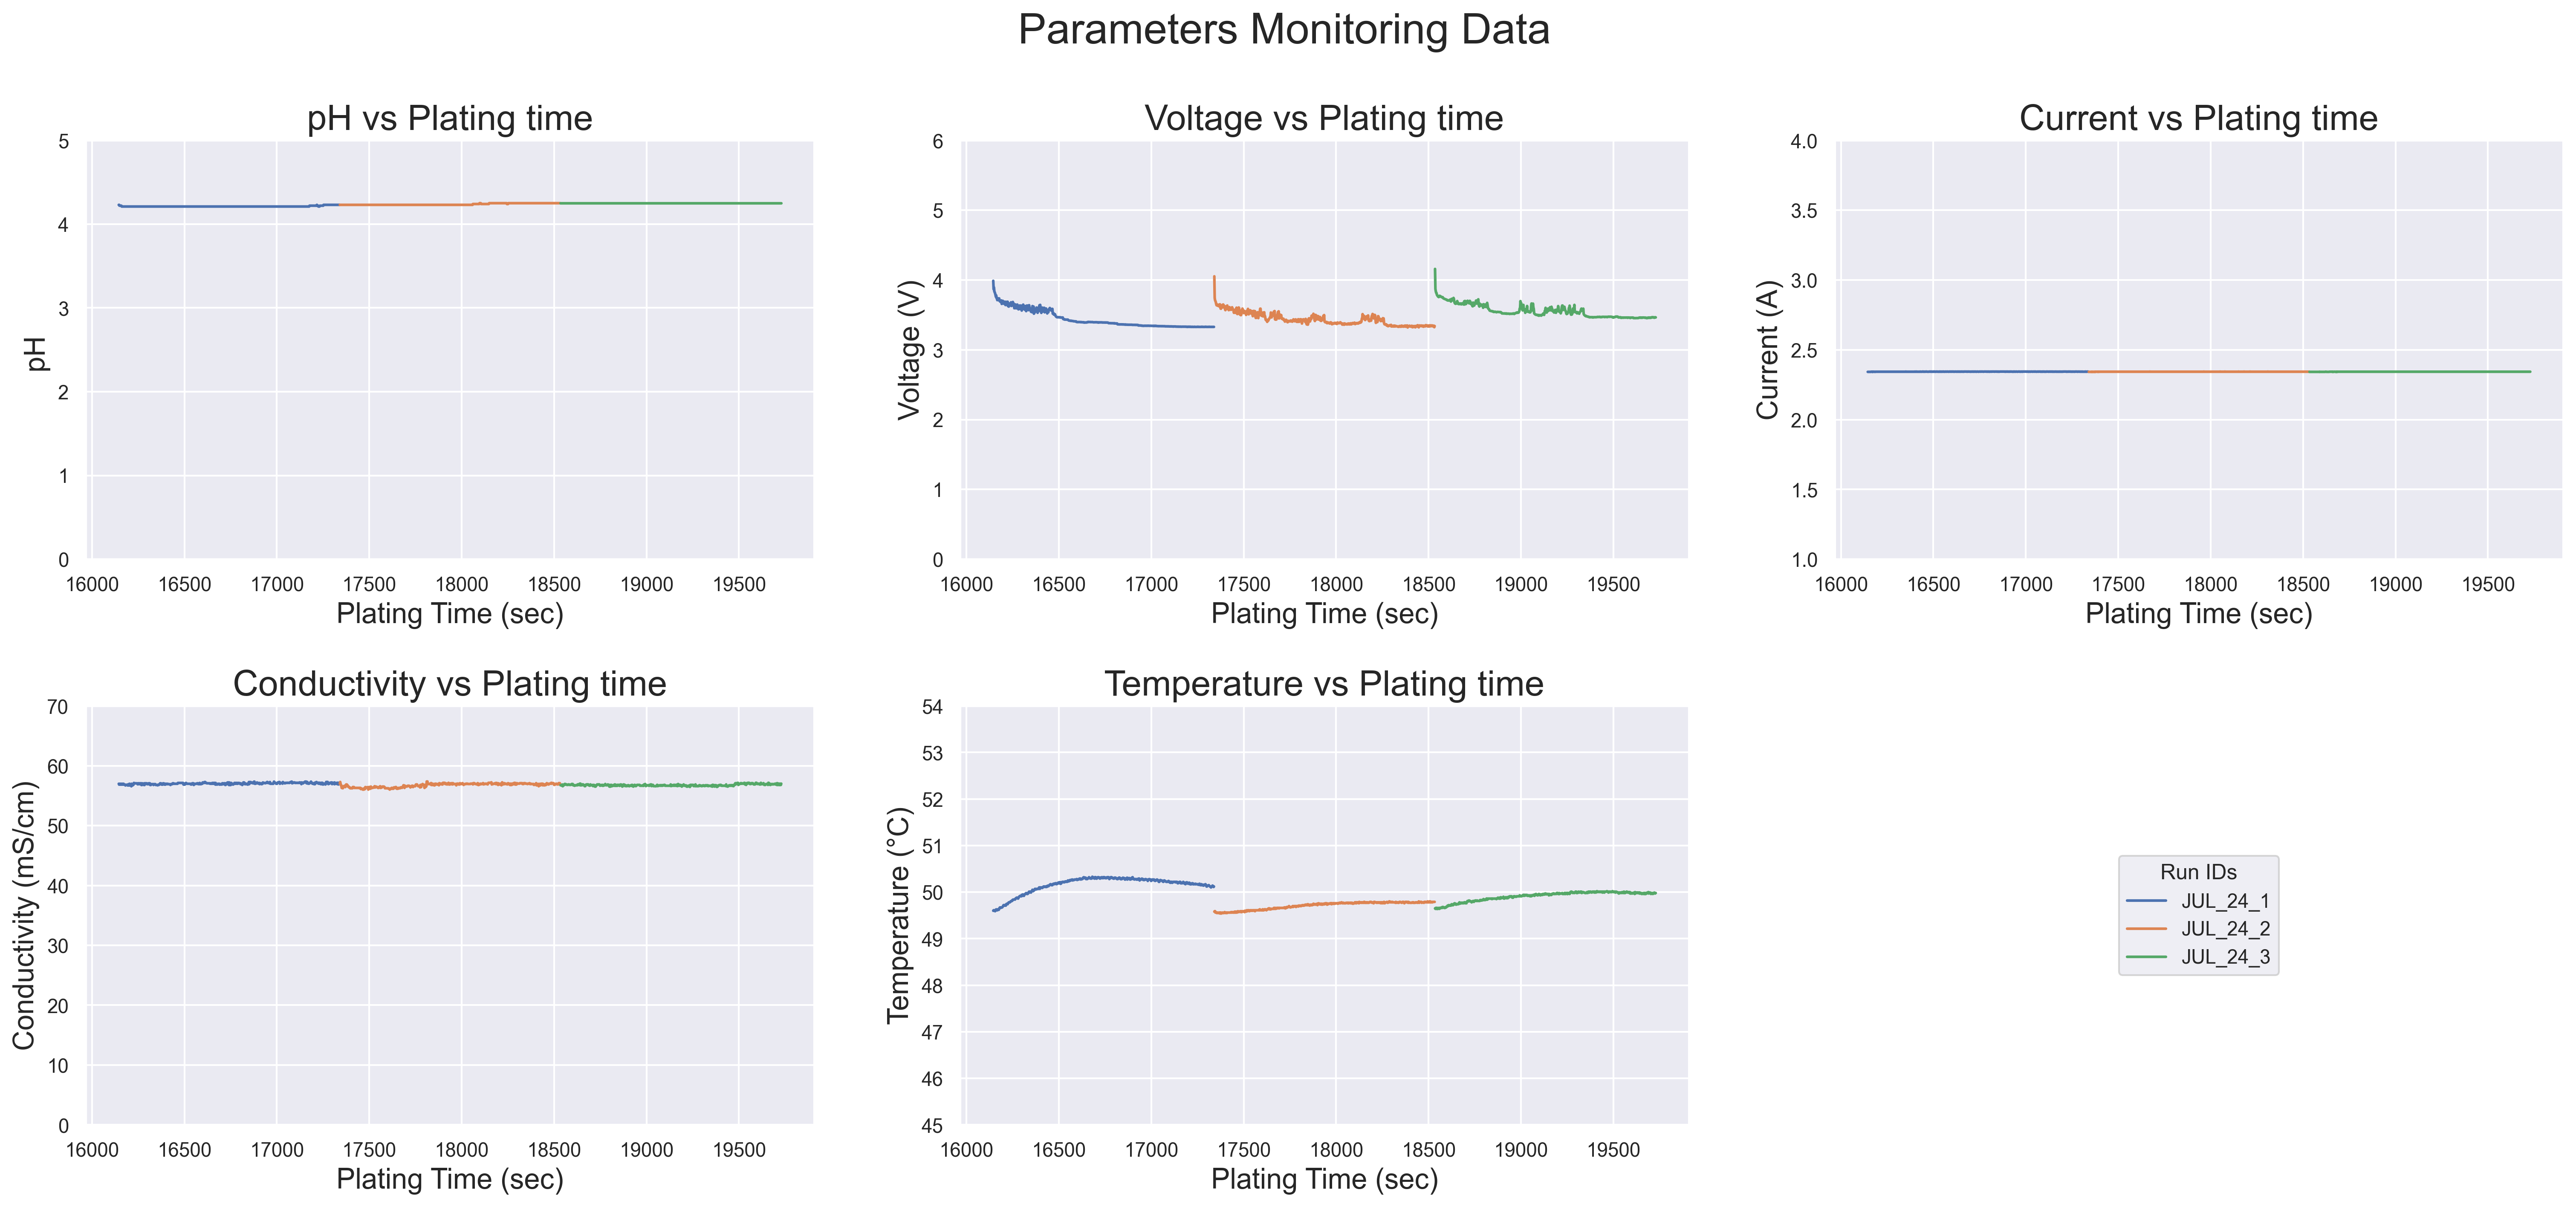

In [19]:
plot_all_params(internal_df, ['JUL_24_1', 'JUL_24_2', 'JUL_24_3'], PARAMS)

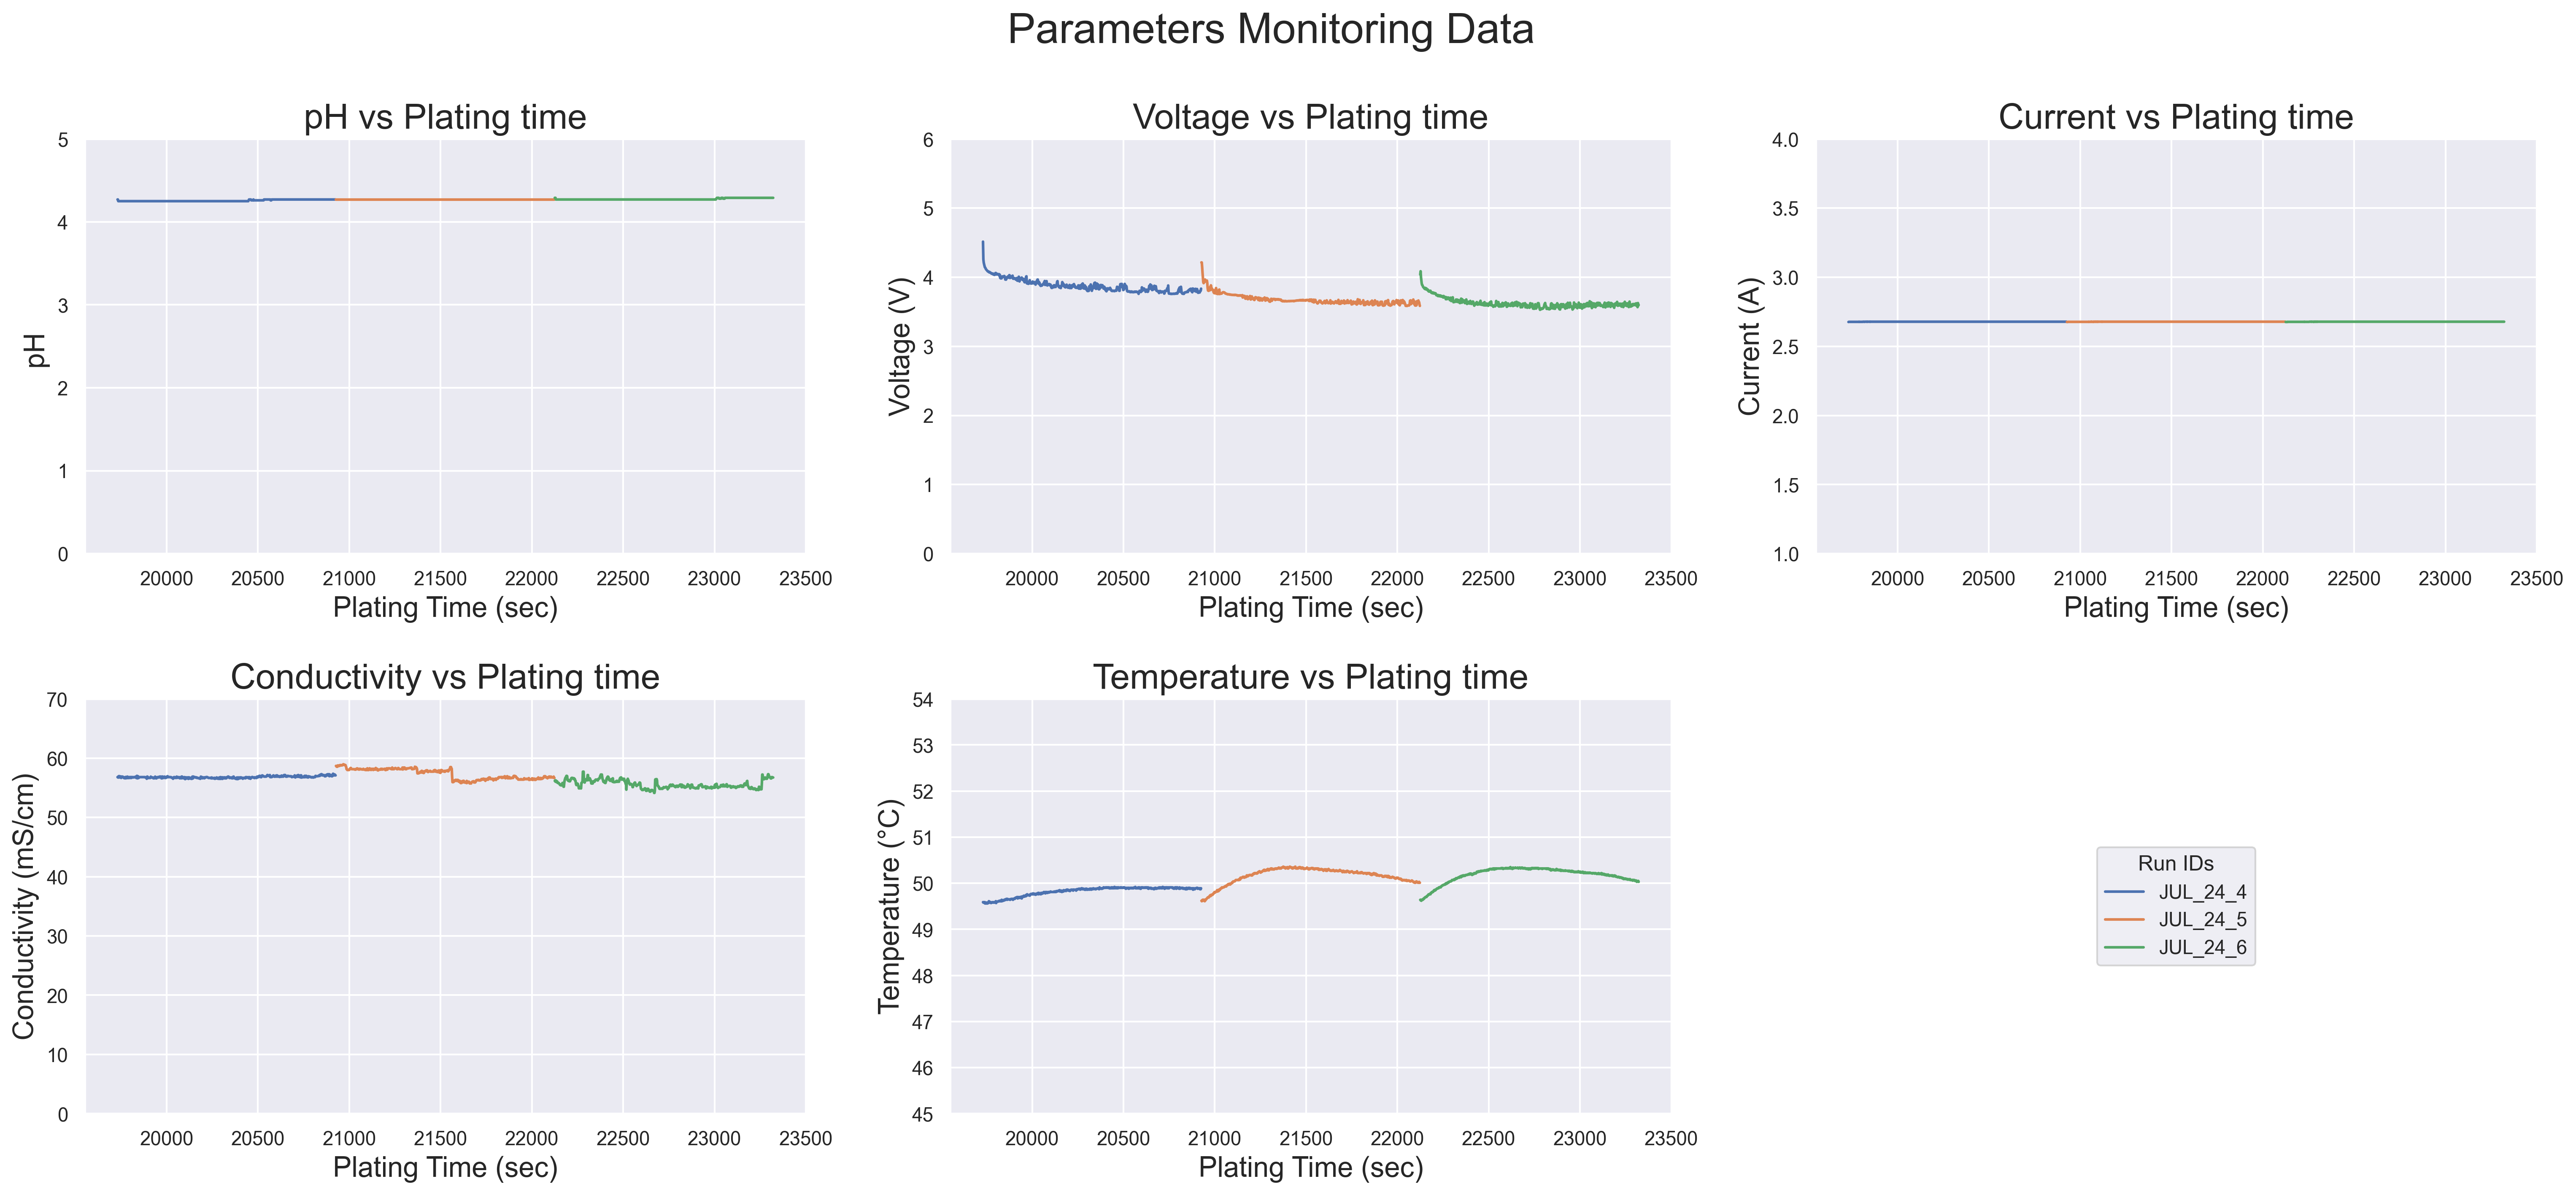

In [20]:
plot_all_params(internal_df, ['JUL_24_4', 'JUL_24_5', 'JUL_24_6'], PARAMS)

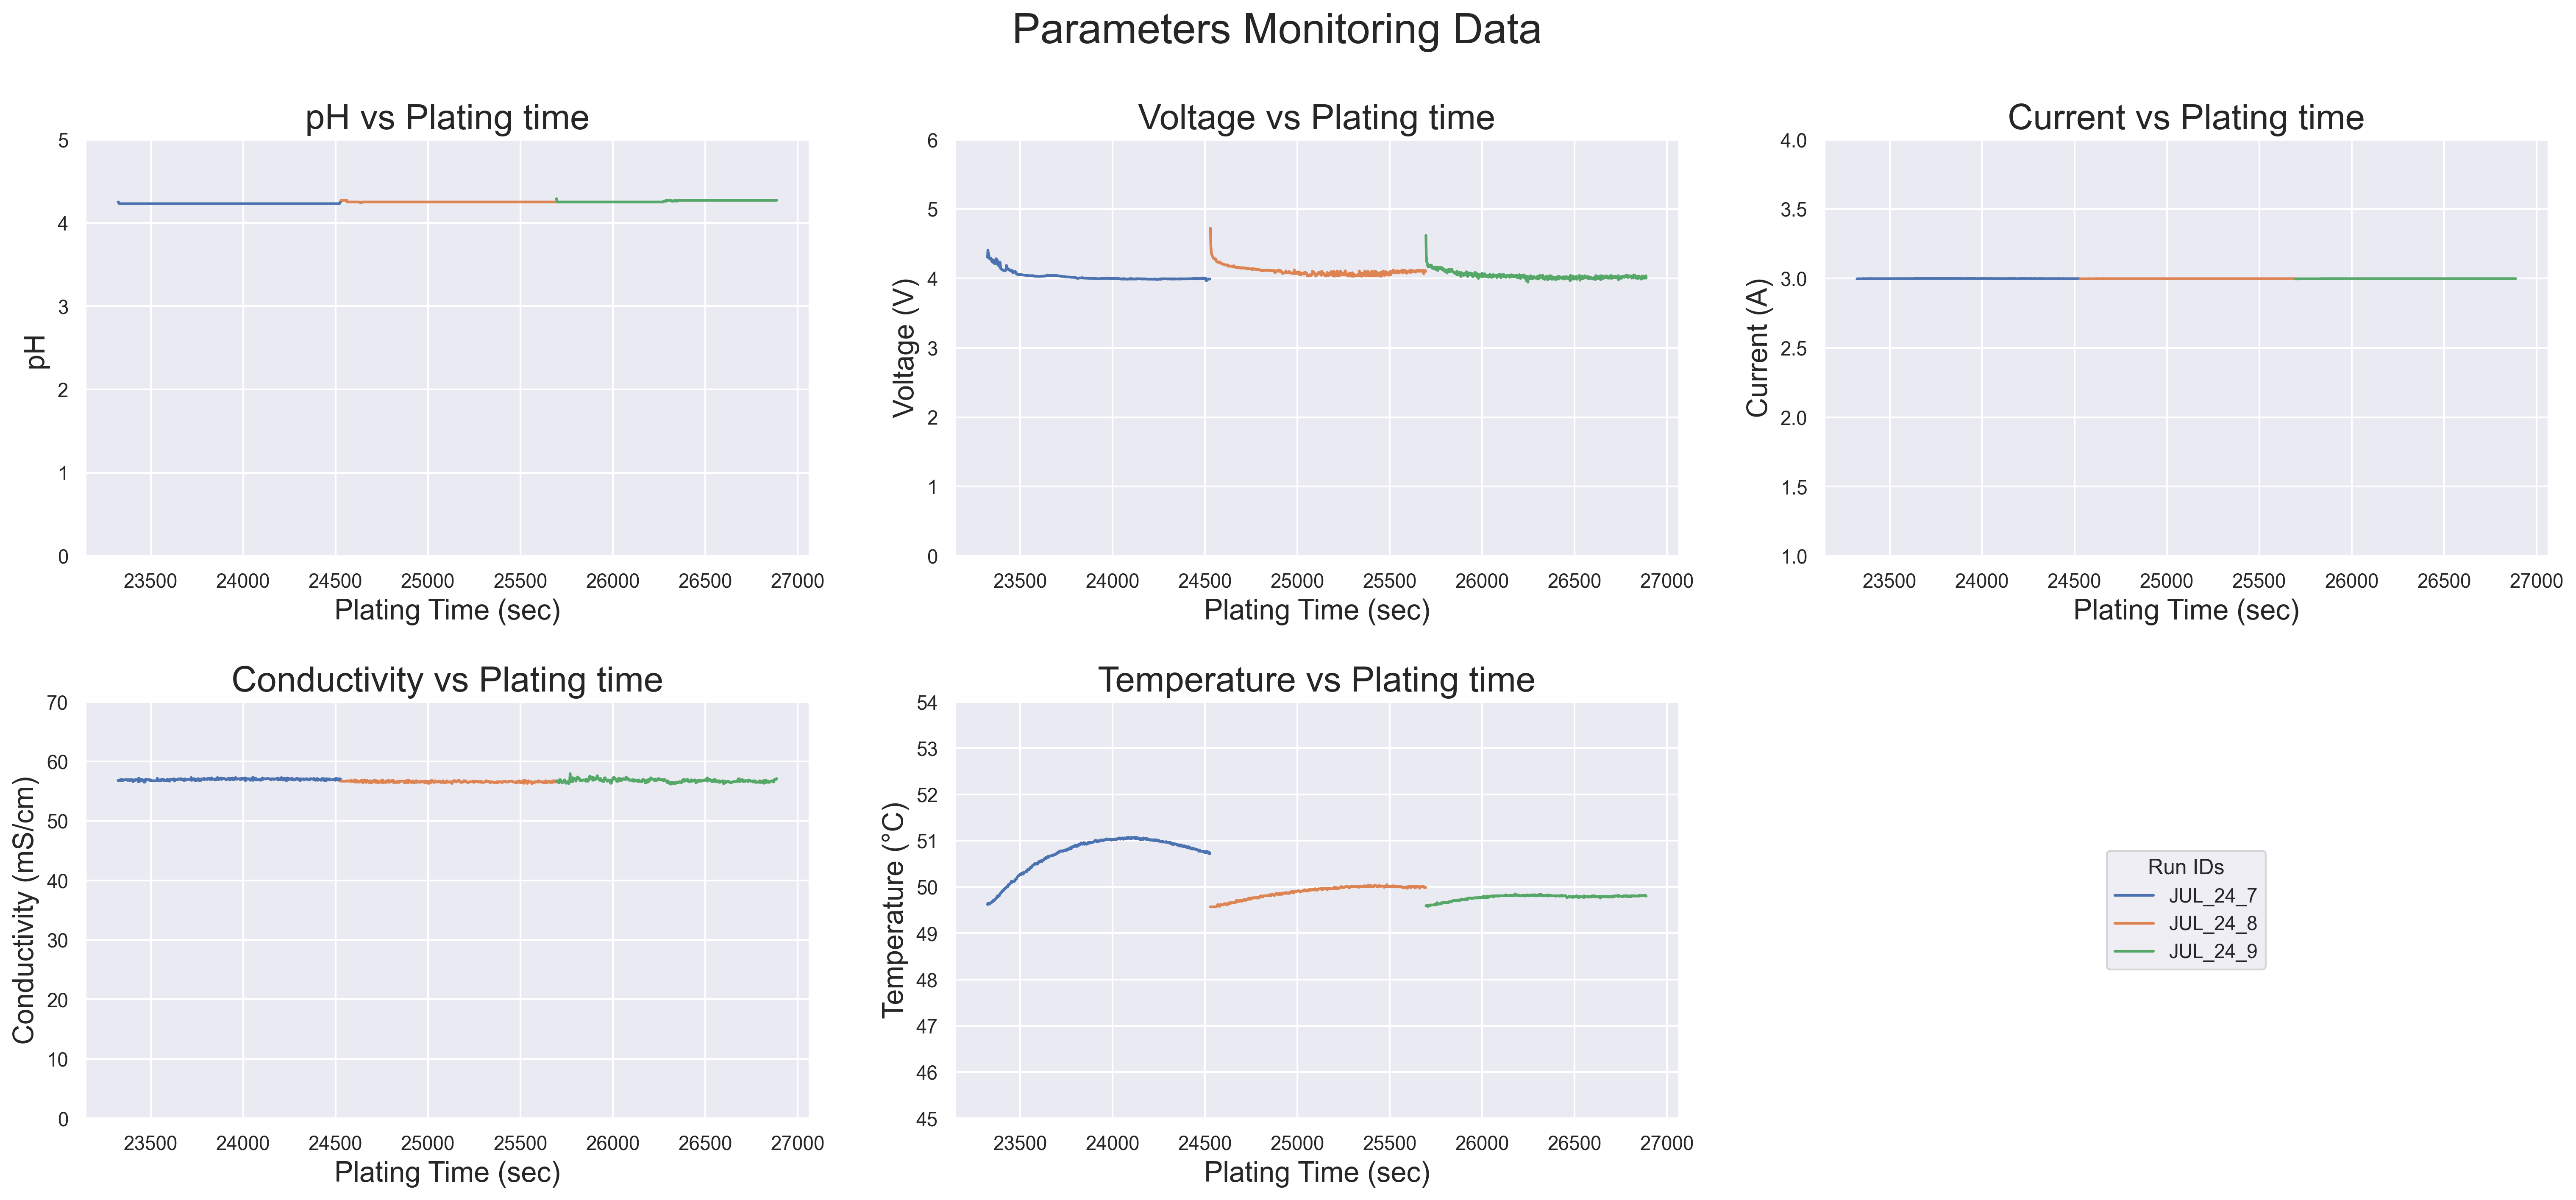

In [21]:
plot_all_params(internal_df, ['JUL_24_7', 'JUL_24_8', 'JUL_24_9'], PARAMS)

## 
---

## Comparison current density at the same agitation rate

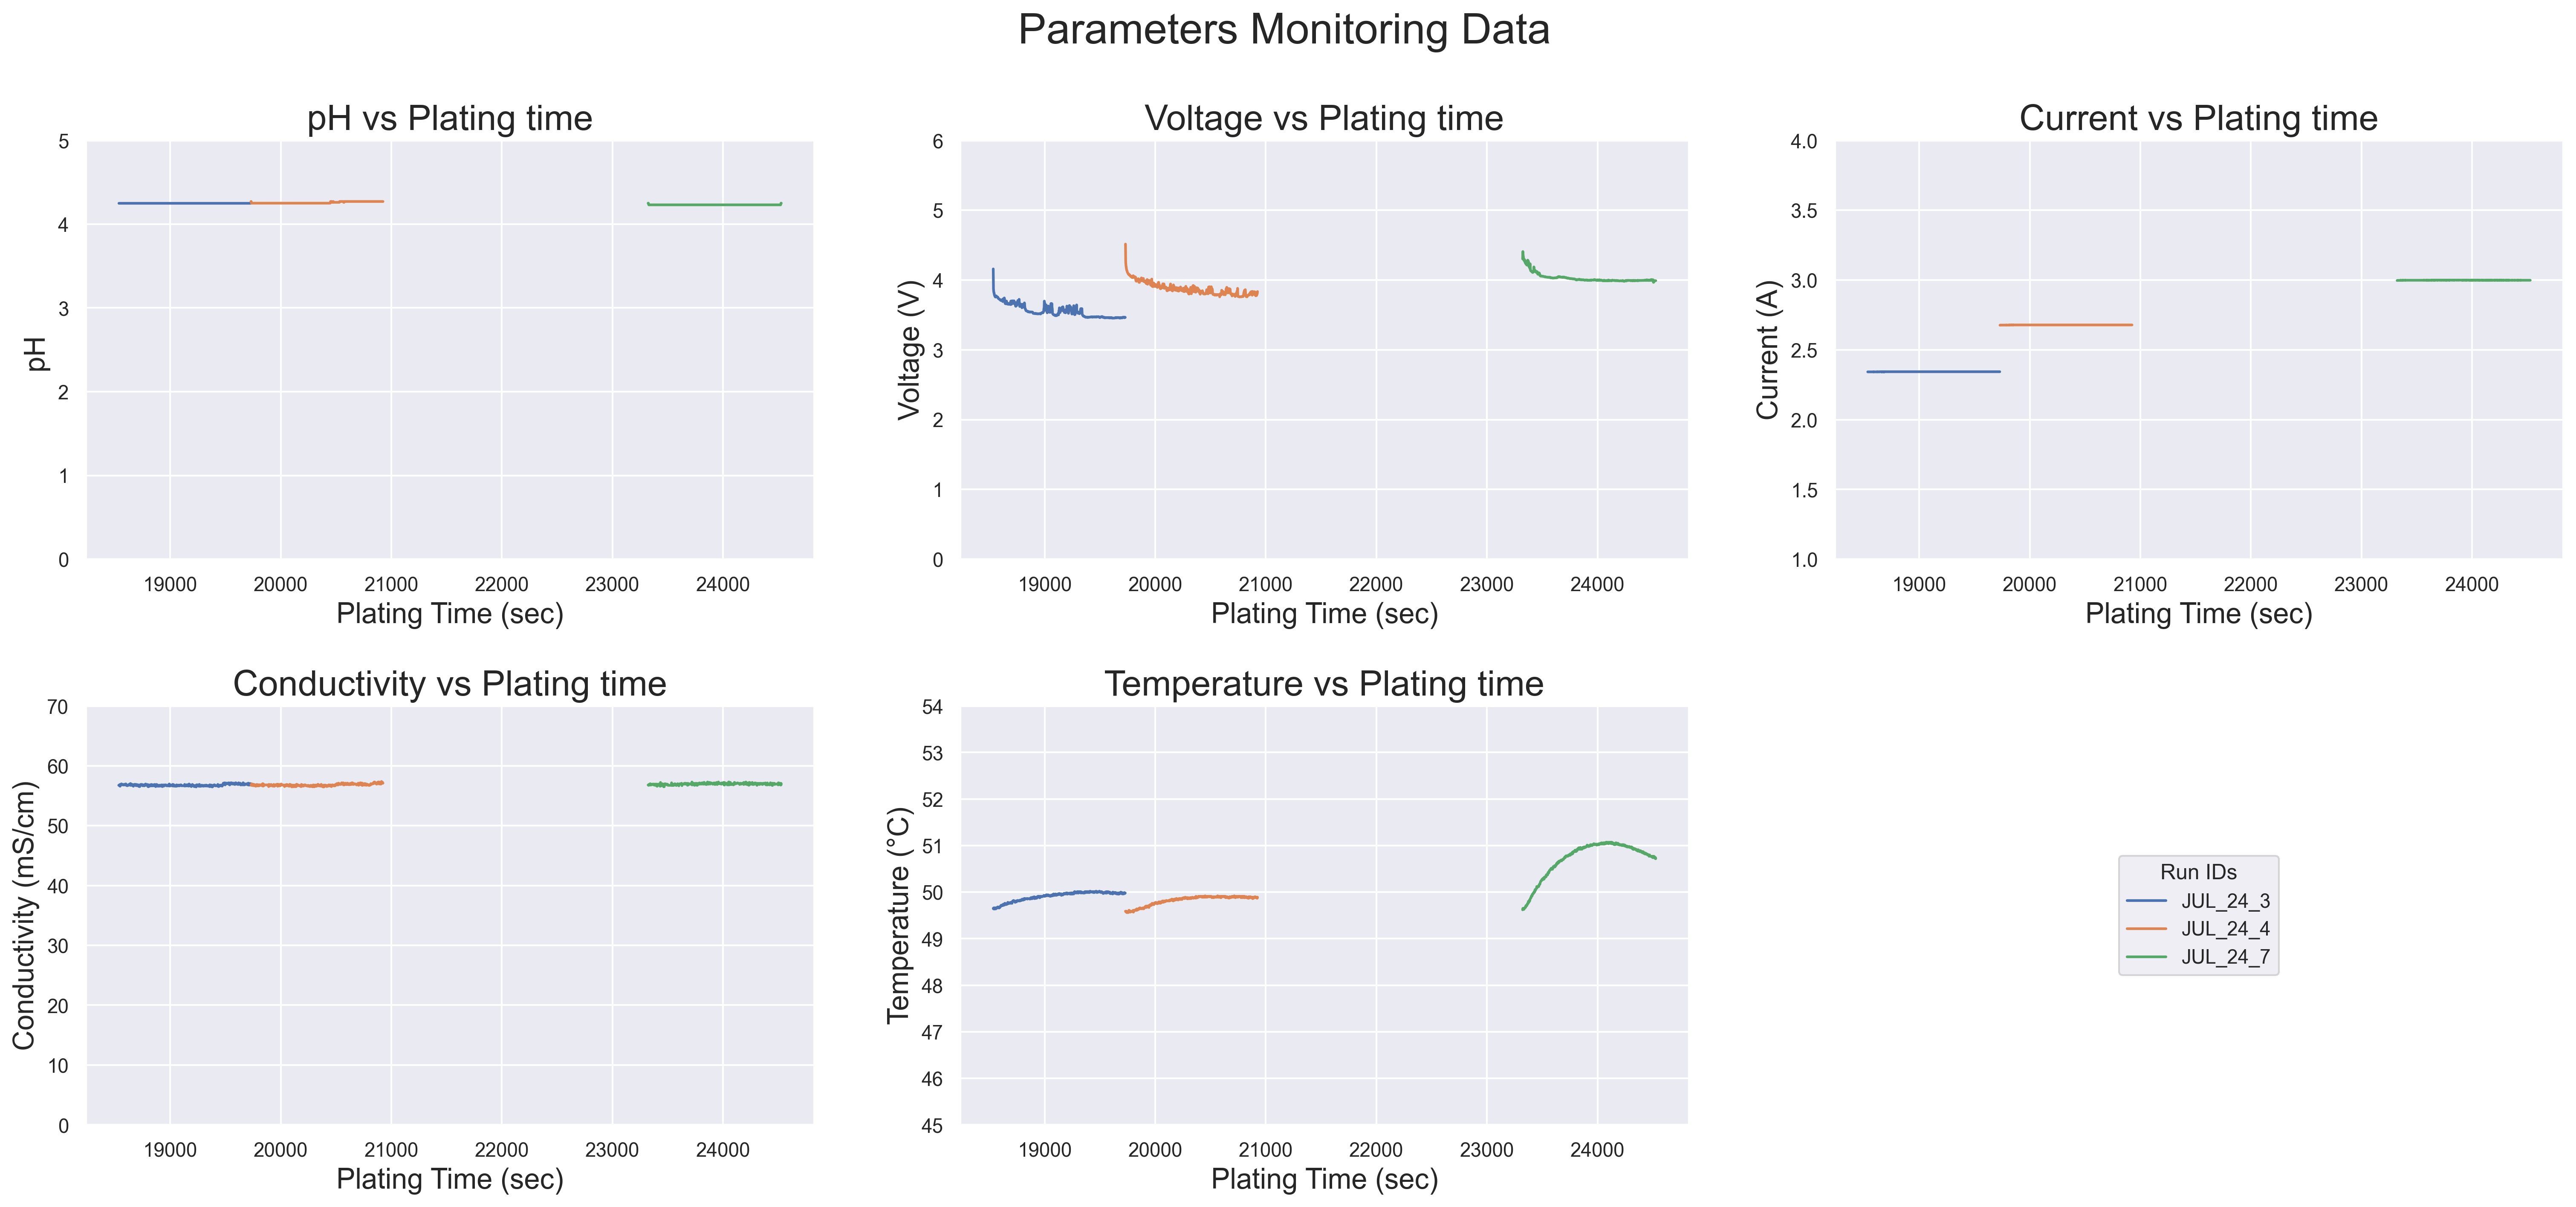

In [22]:
plot_all_params(internal_df, ['JUL_24_3', 'JUL_24_4', 'JUL_24_7'], PARAMS)

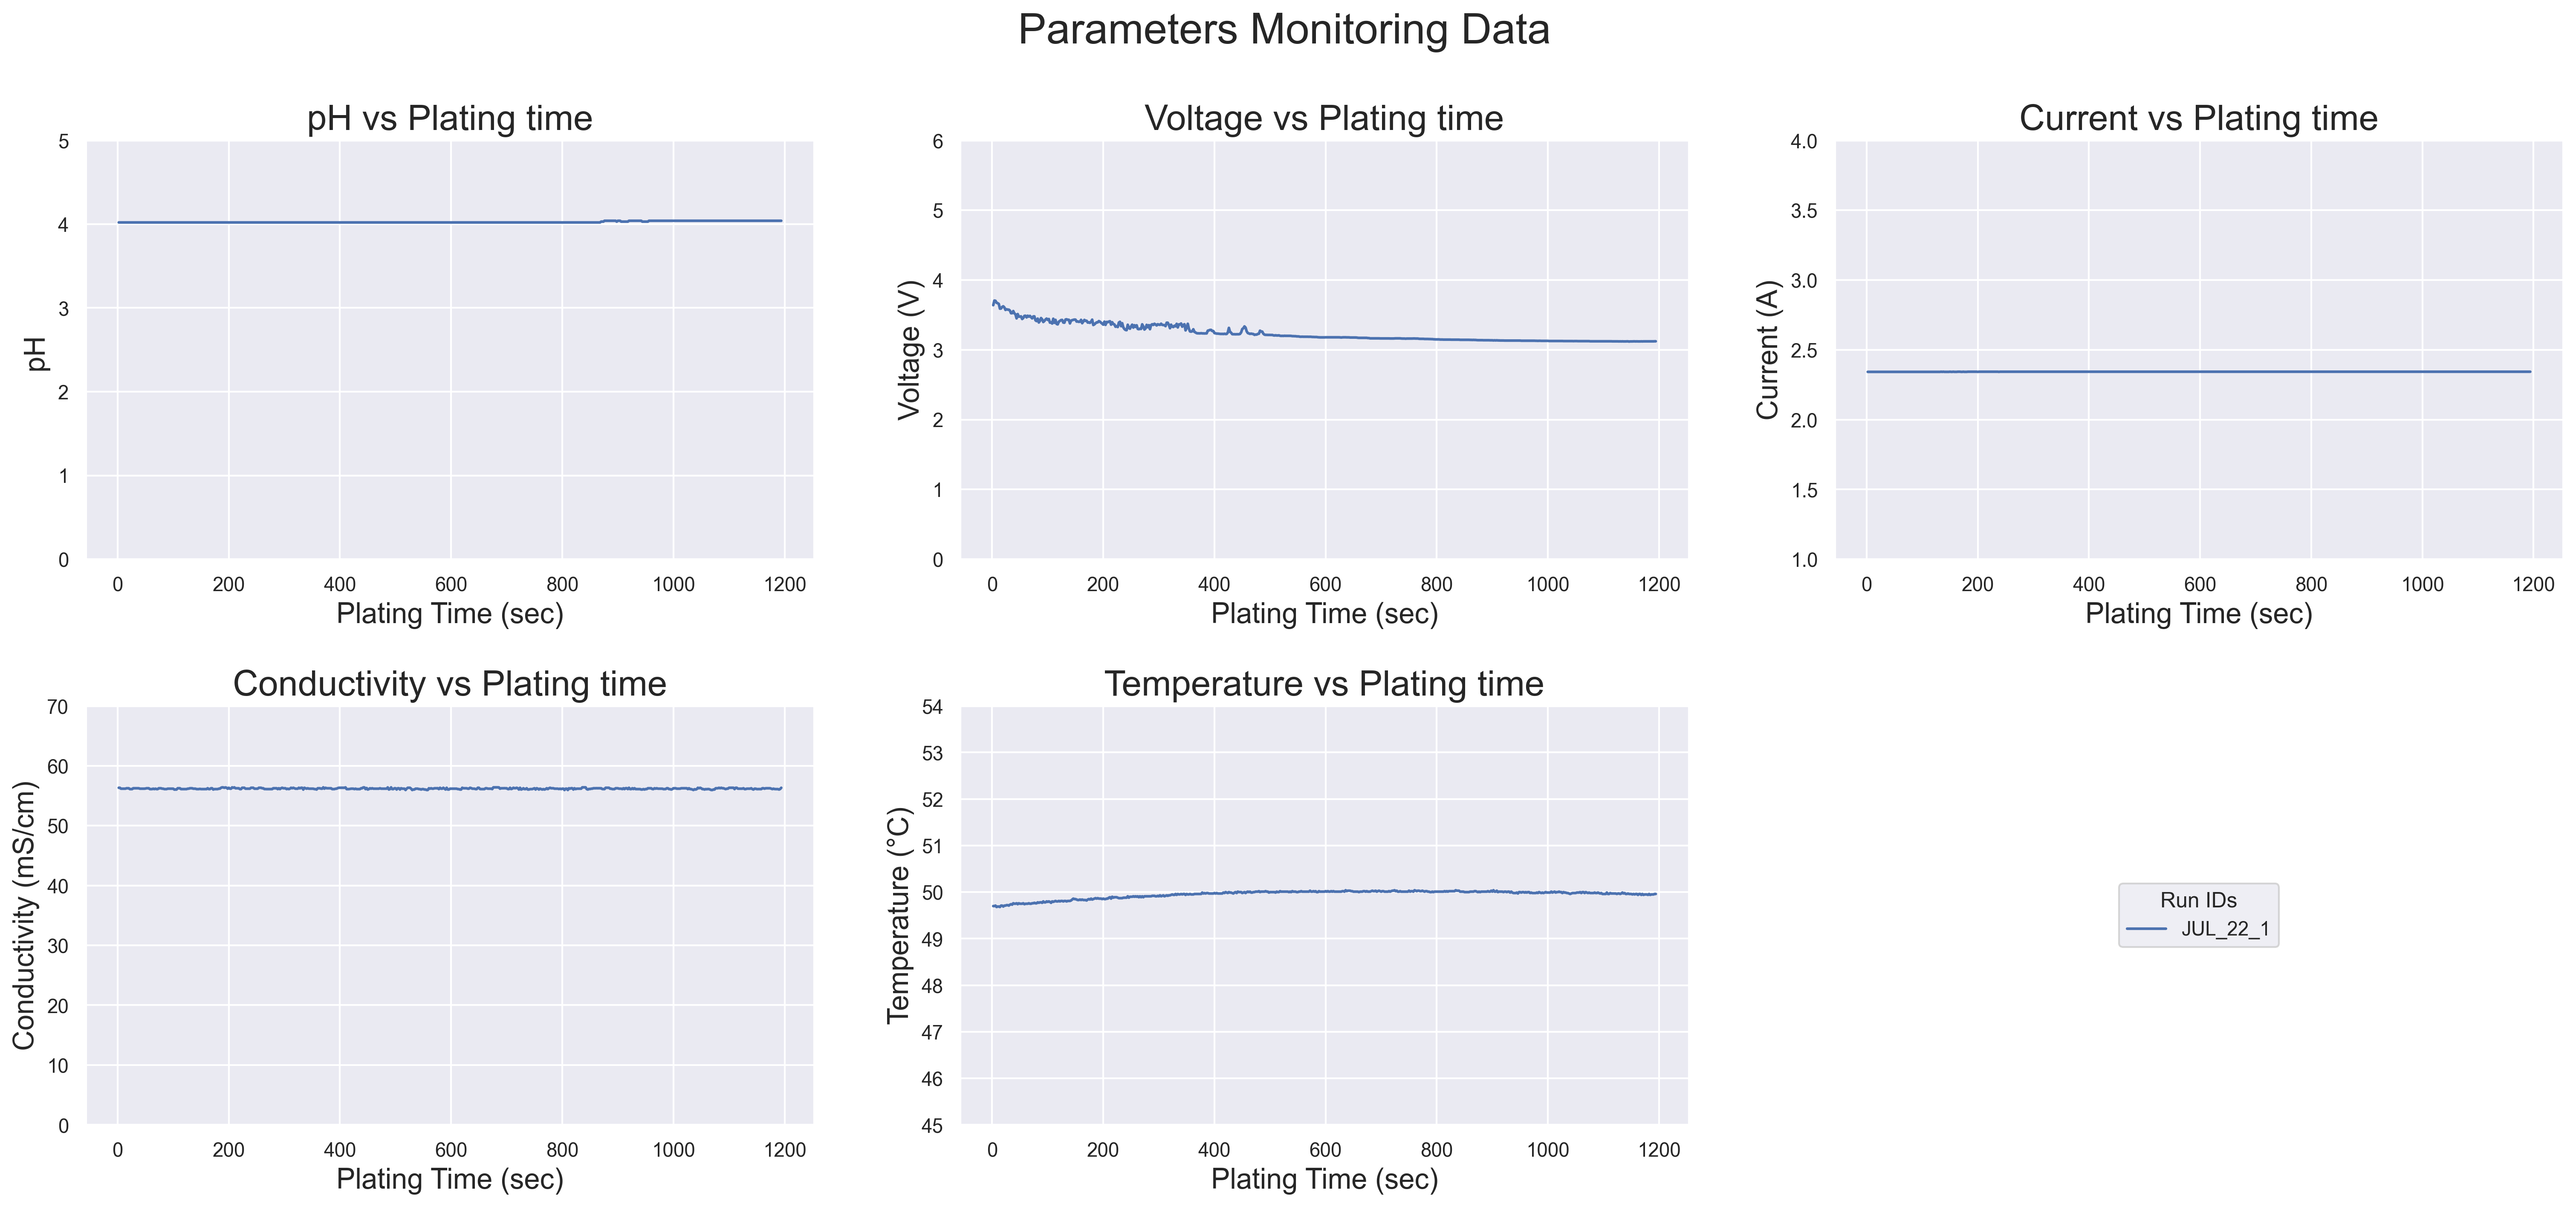

In [23]:
plot_all_params(combined_df, ['JUL_22_1'], PARAMS)

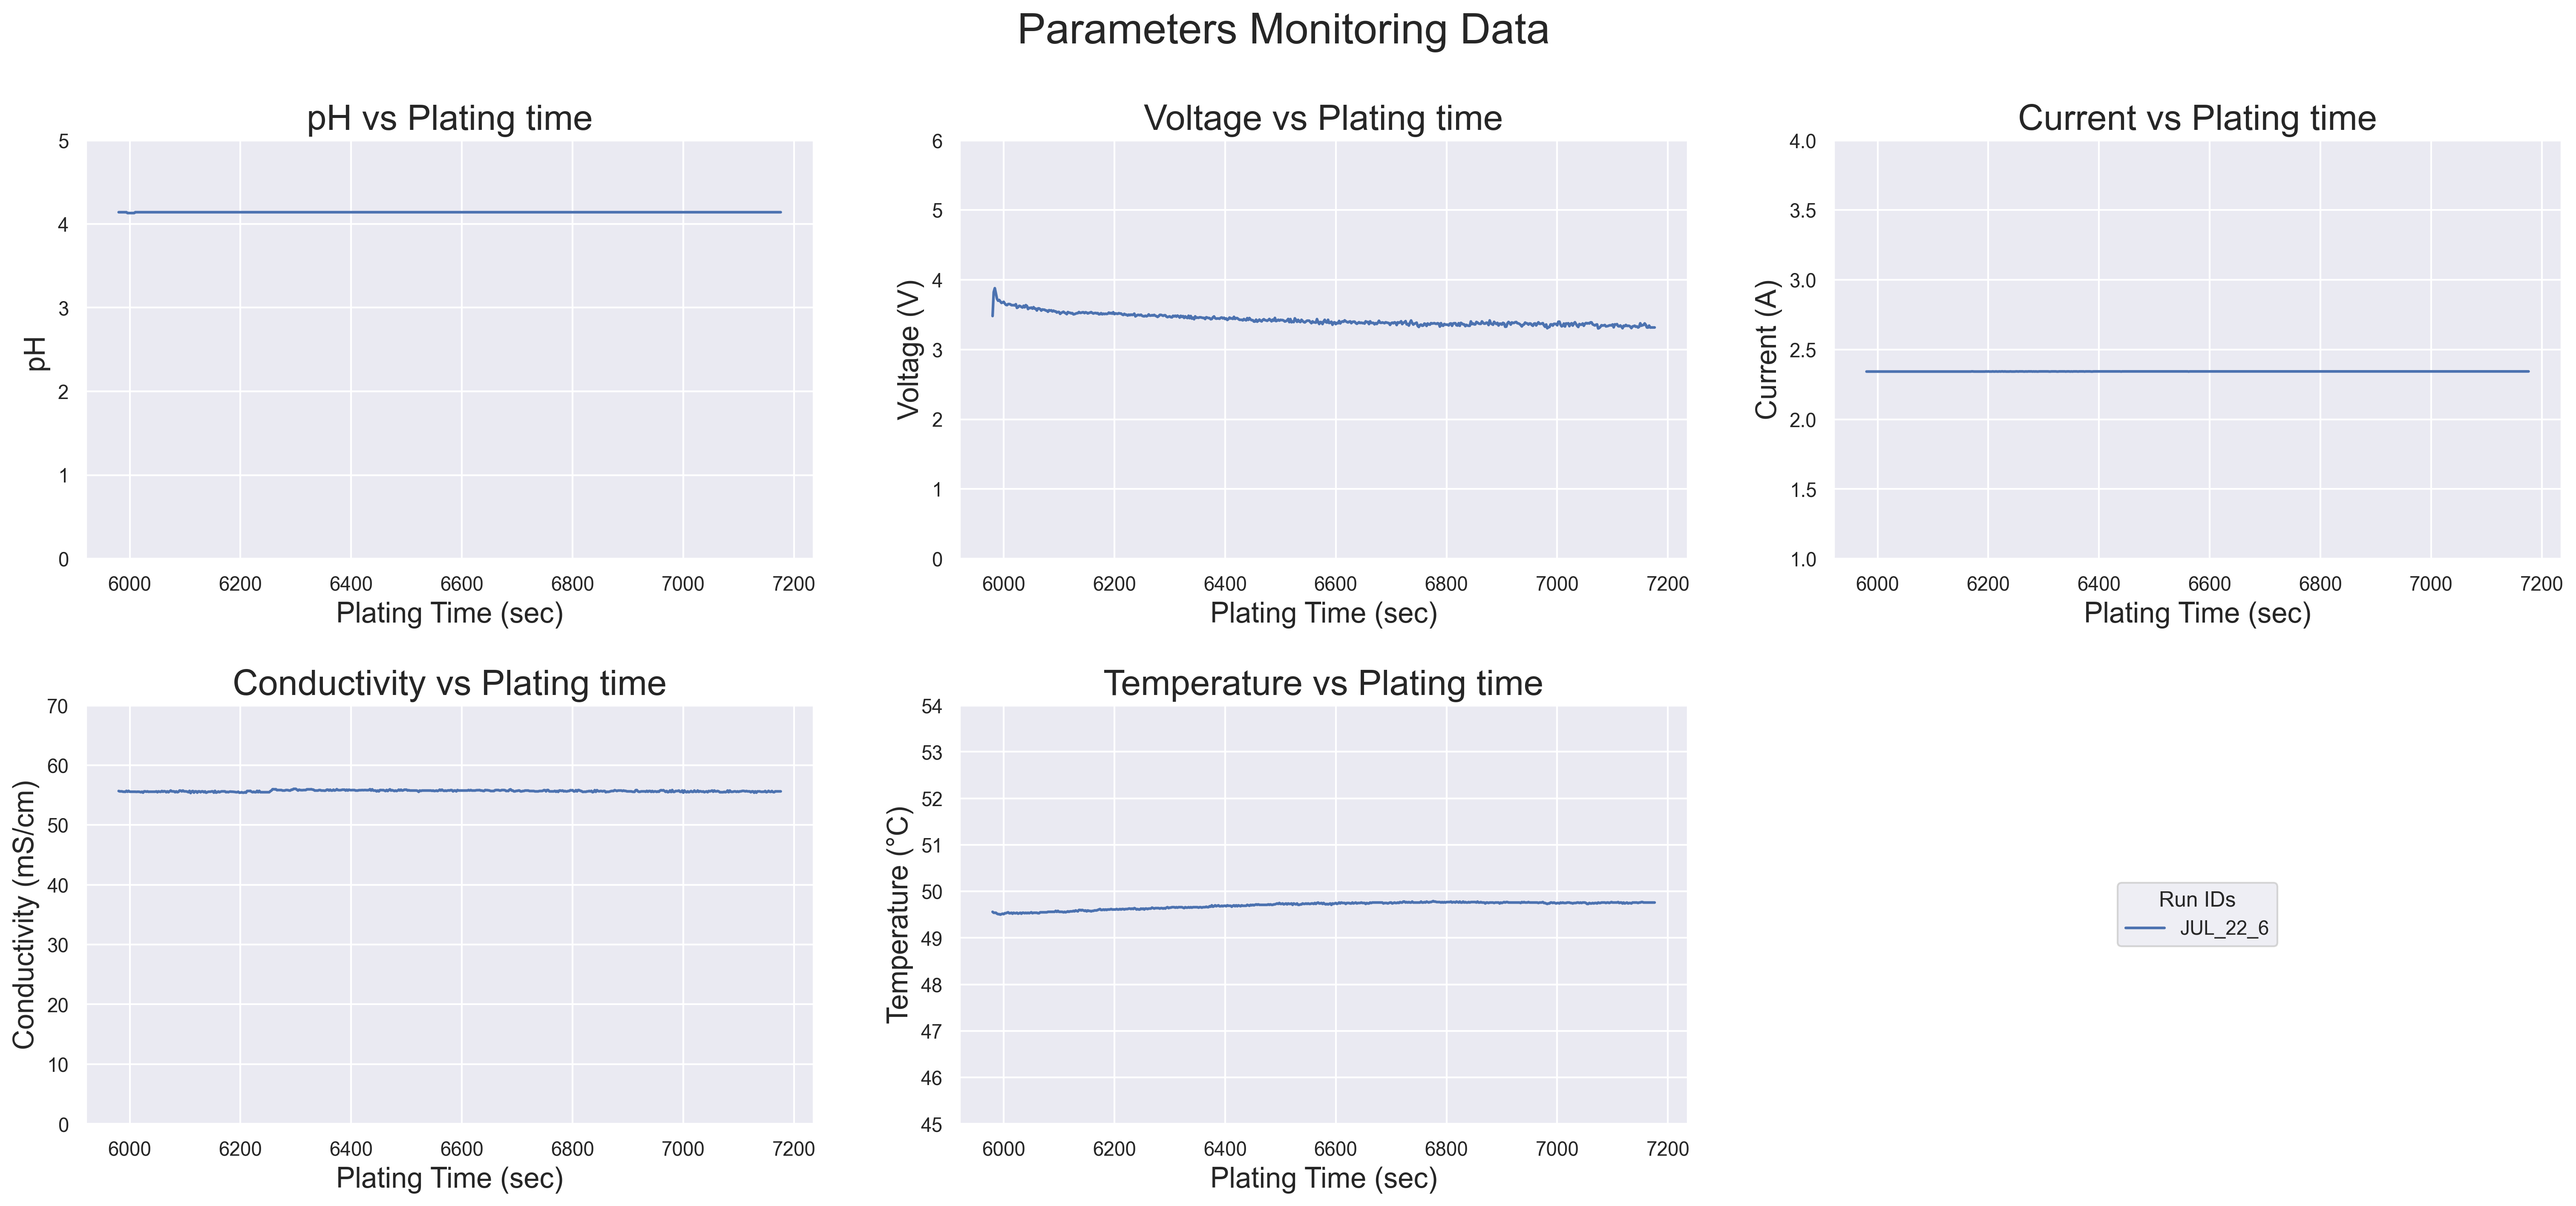

In [24]:
plot_all_params(combined_df, ['JUL_22_6'], PARAMS)

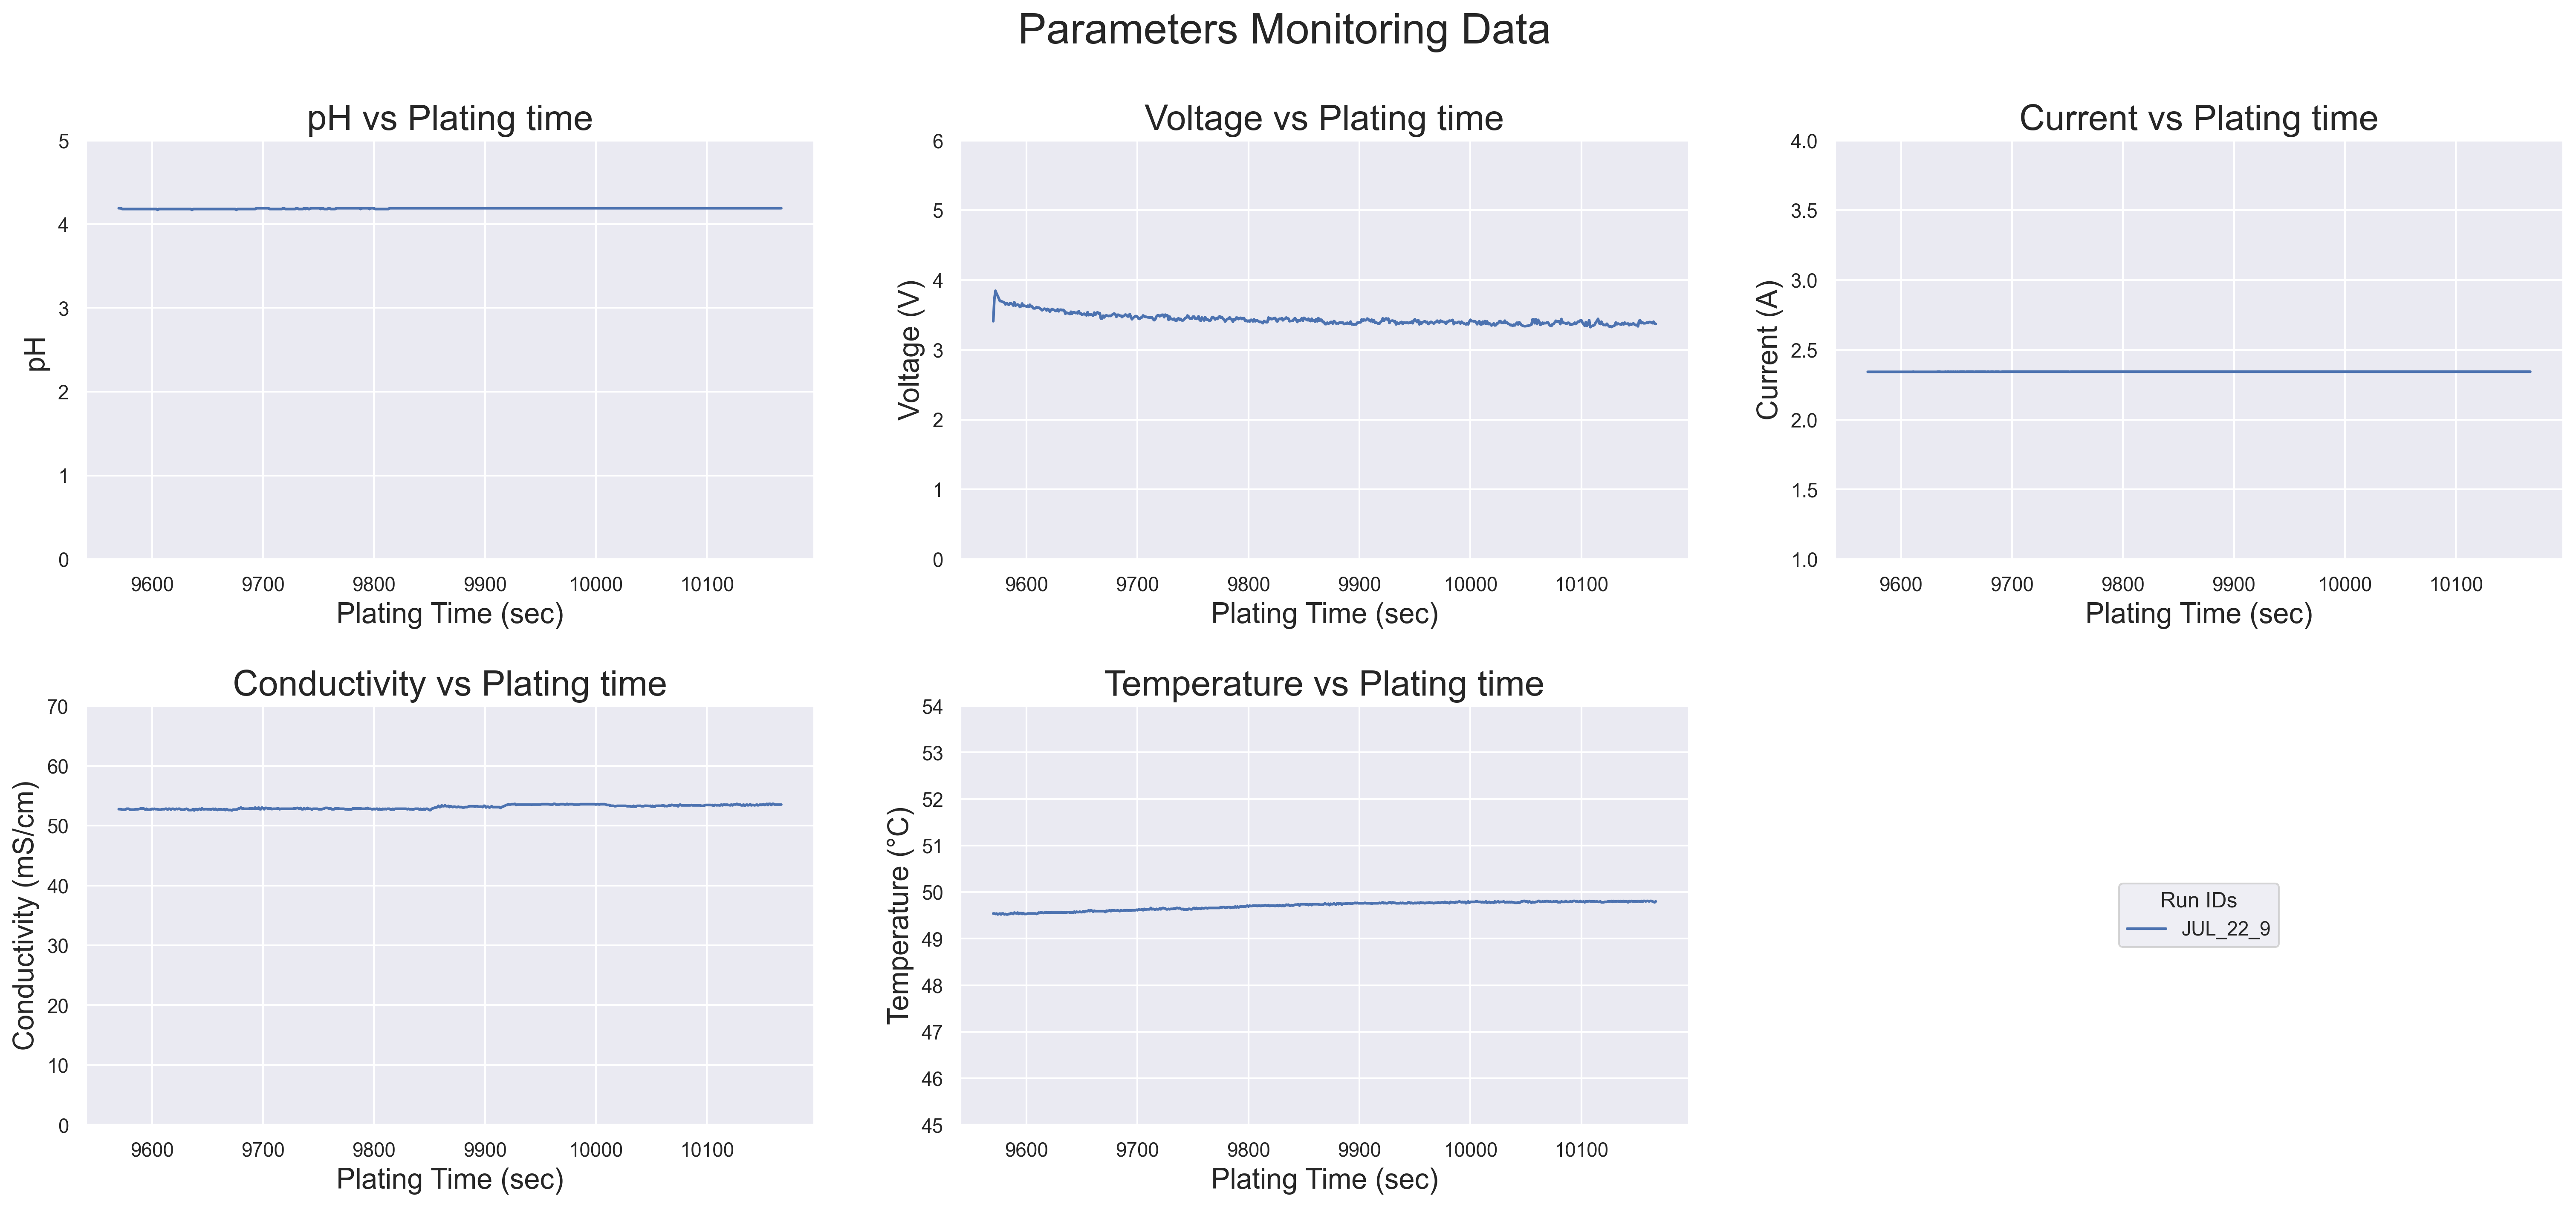

In [25]:
plot_all_params(combined_df, ['JUL_22_9'], PARAMS)

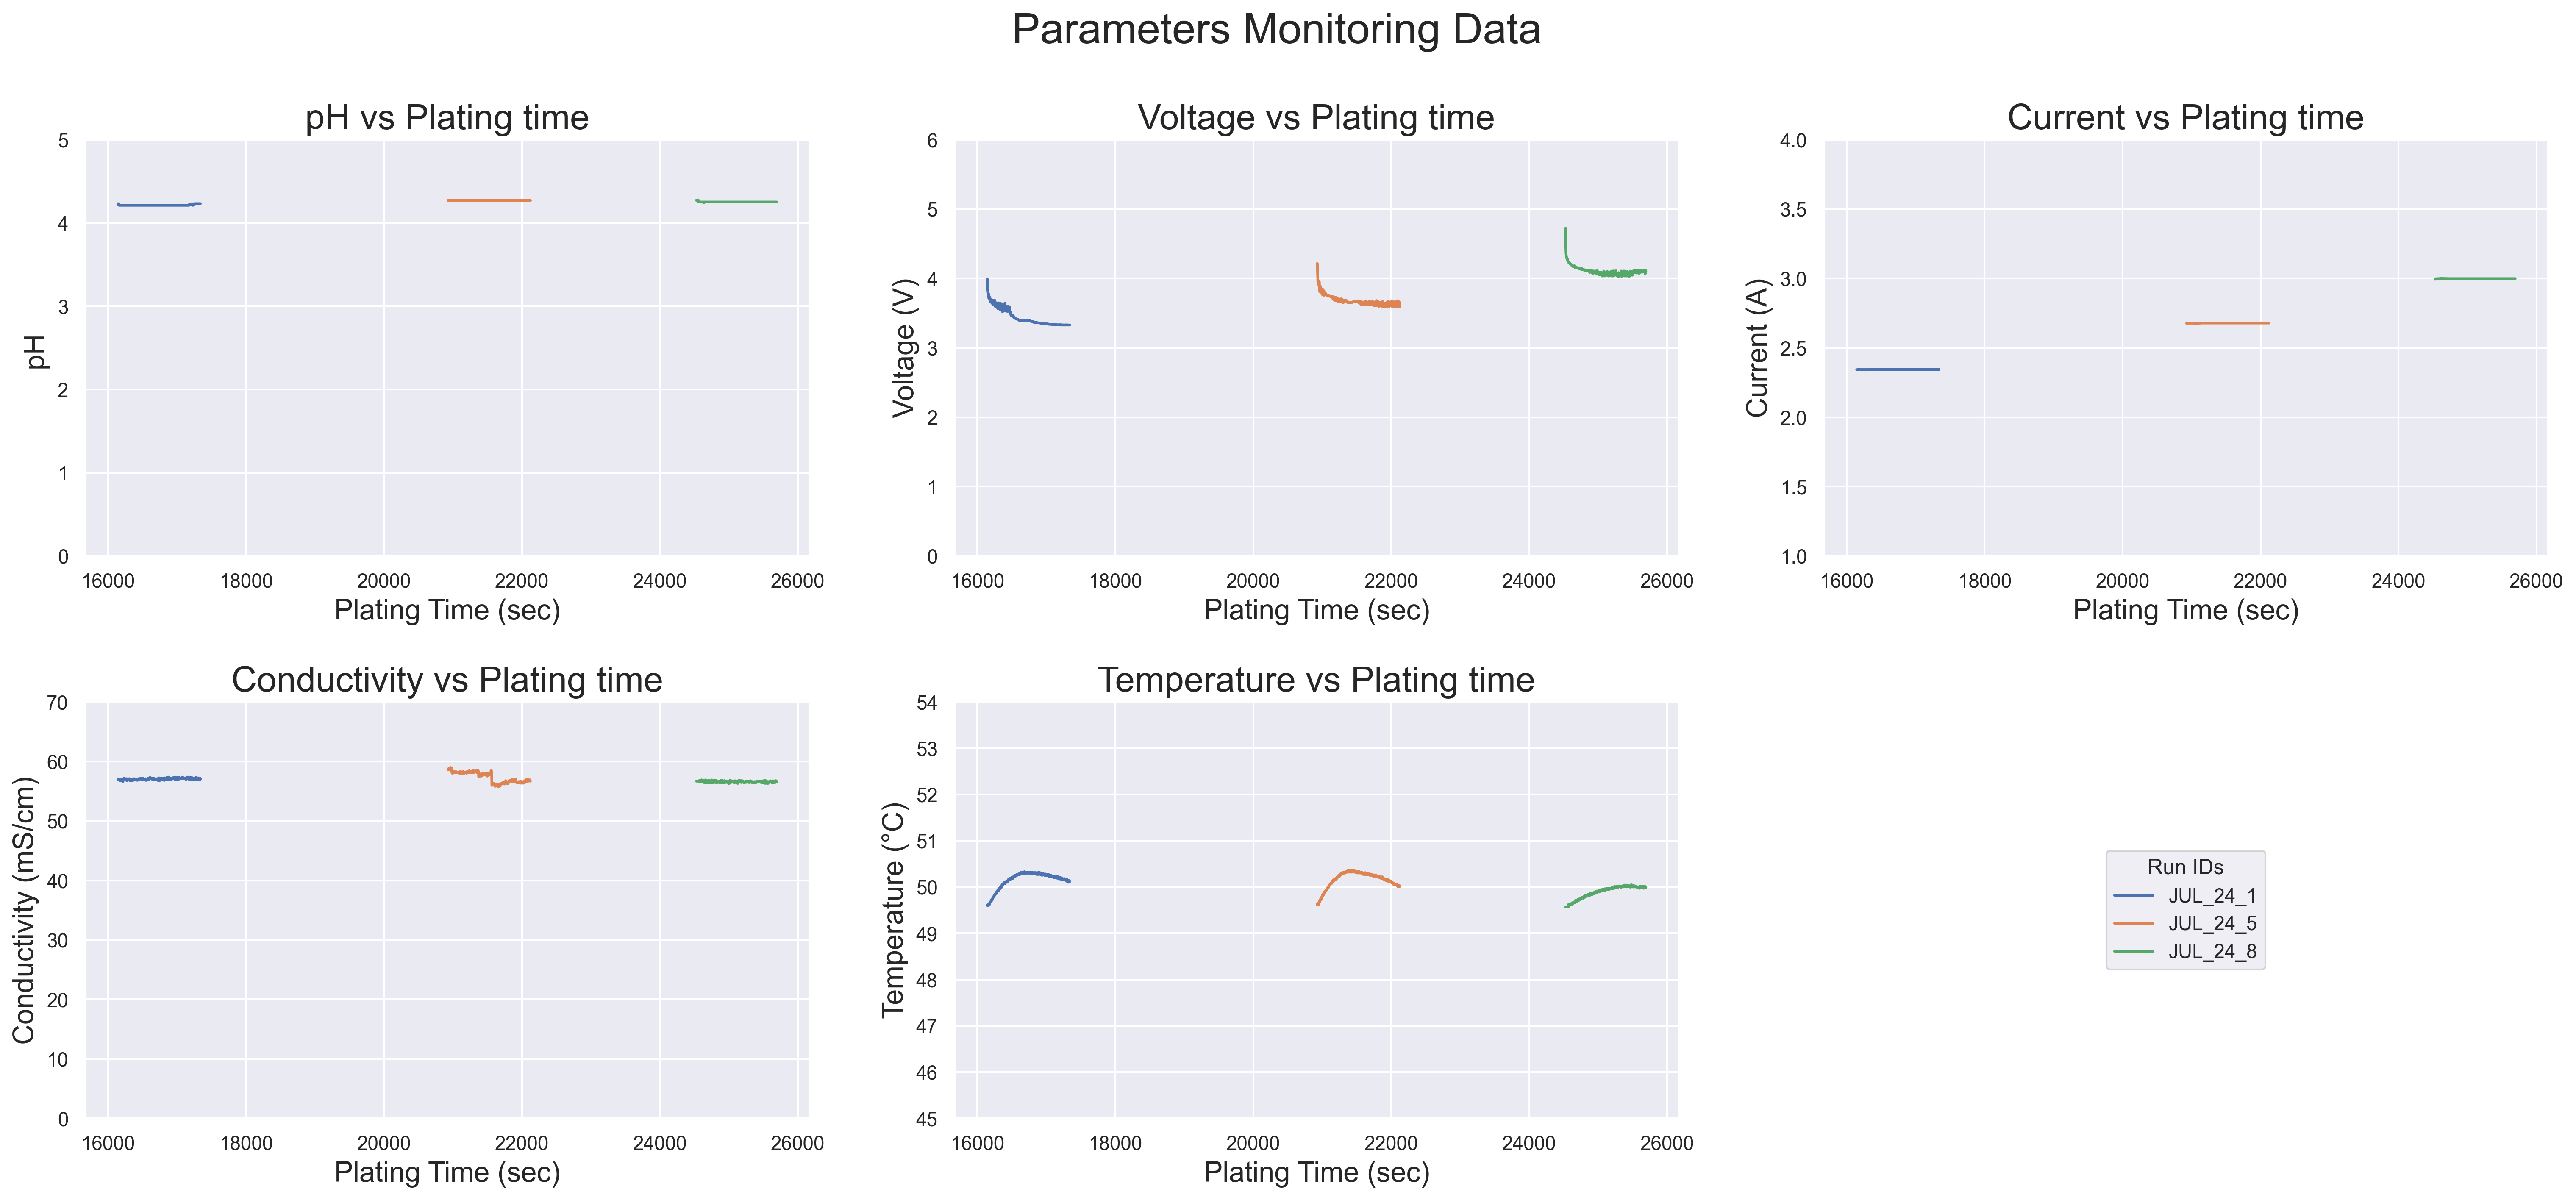

In [26]:
plot_all_params(internal_df, ['JUL_24_1', 'JUL_24_5', 'JUL_24_8'], PARAMS)

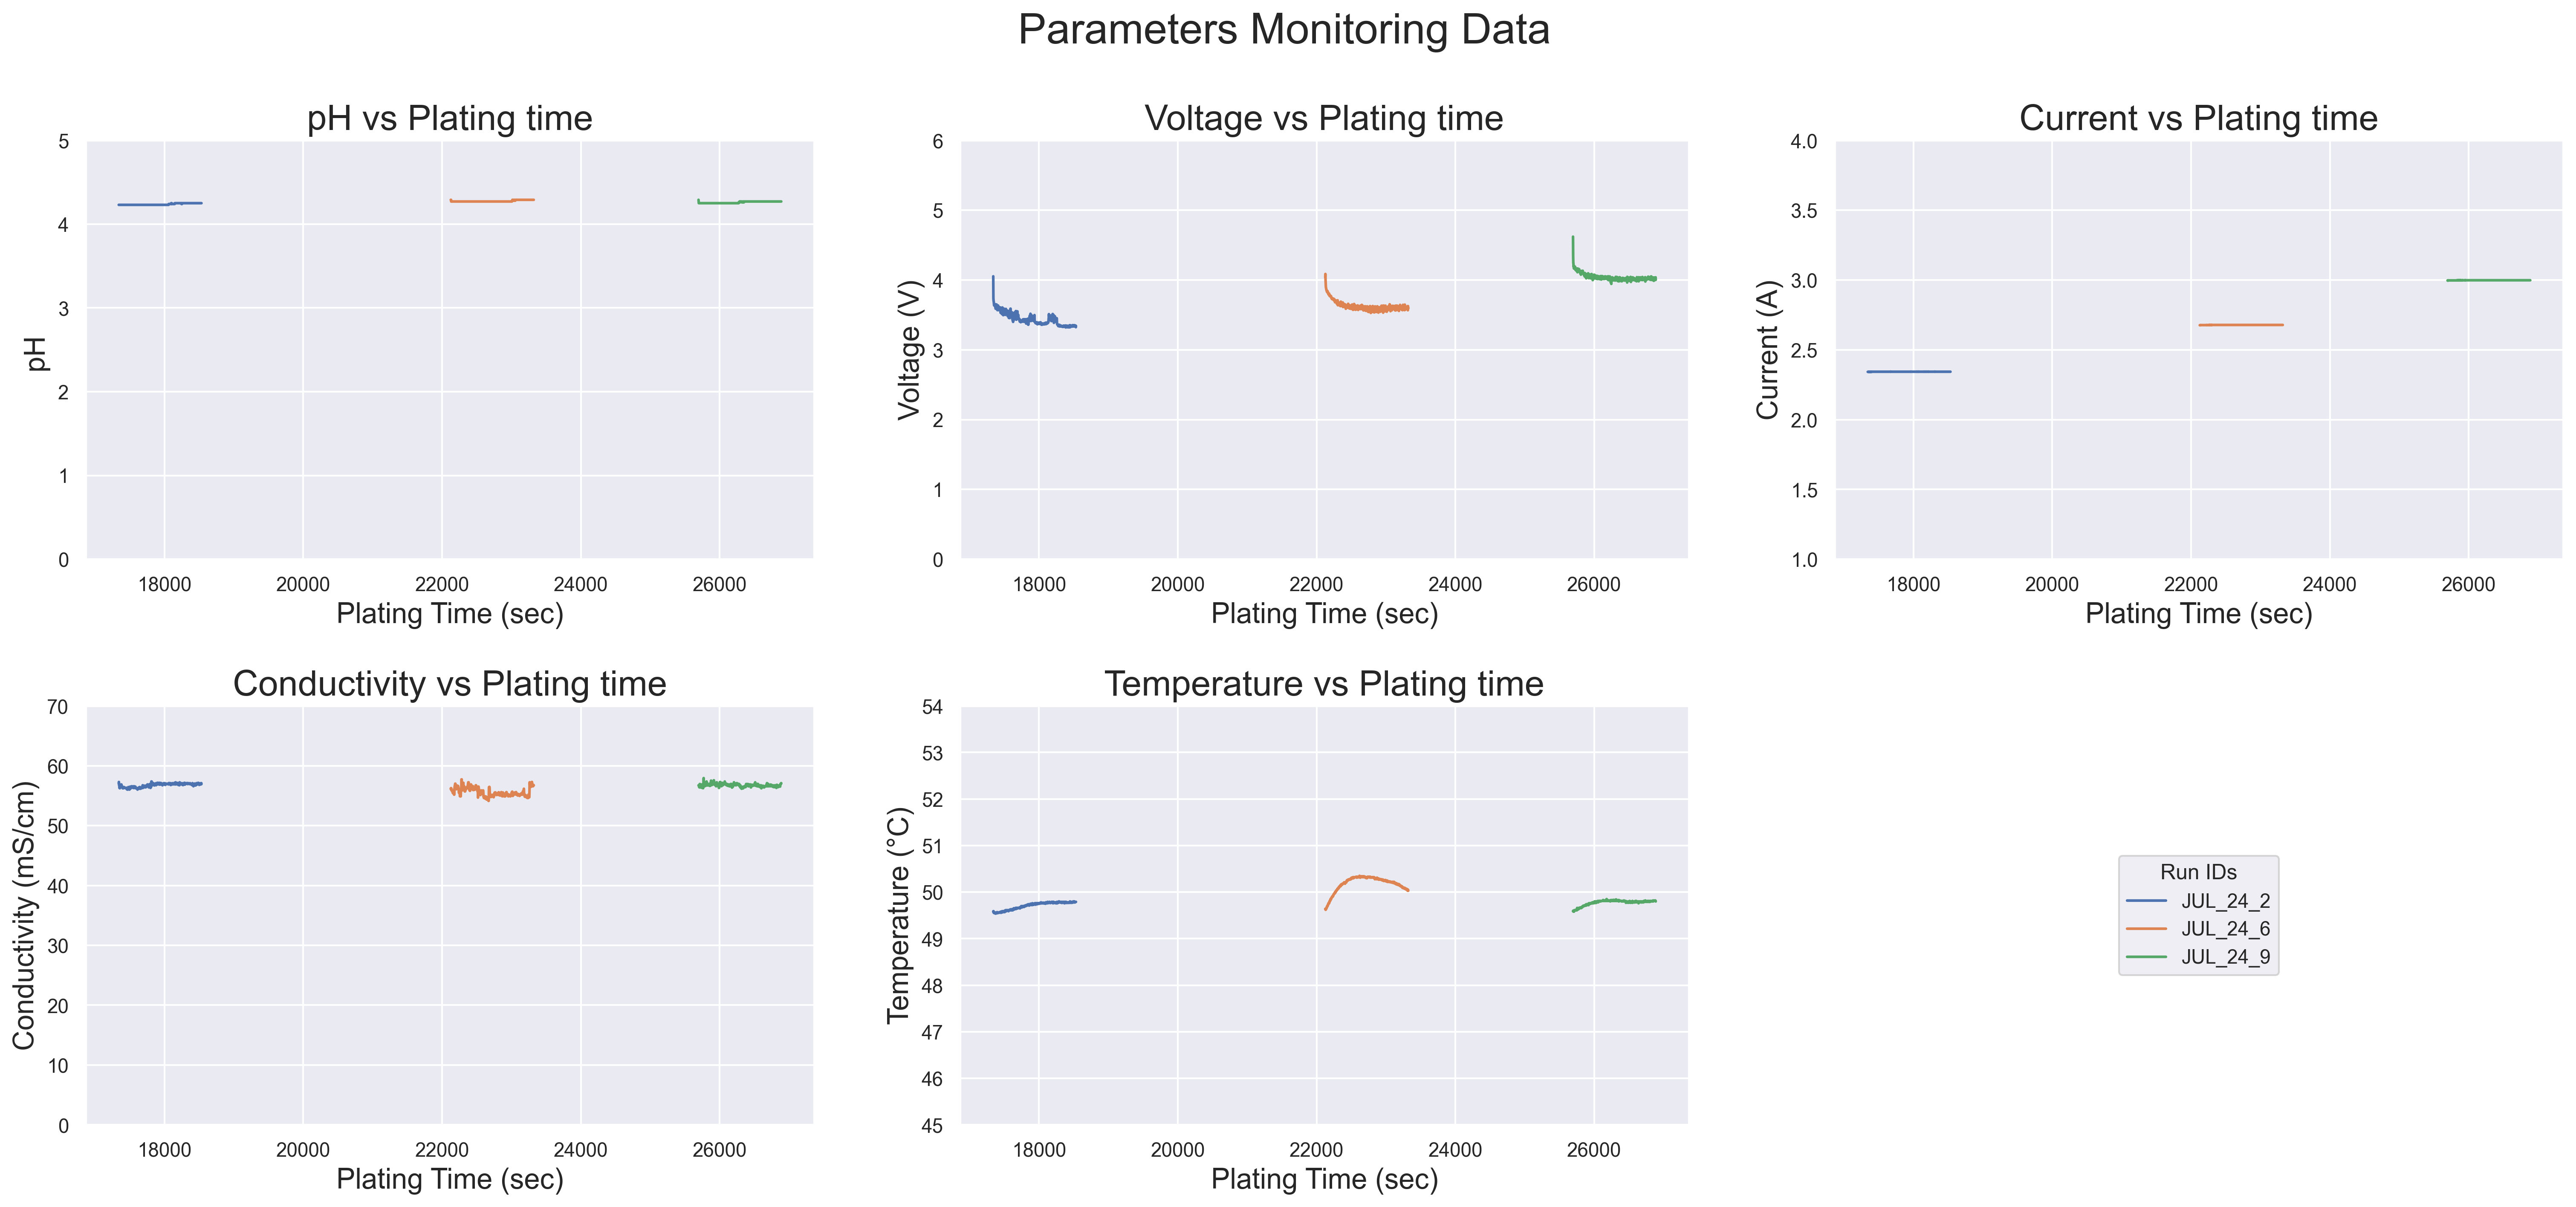

In [27]:
plot_all_params(internal_df, ['JUL_24_2', 'JUL_24_6', 'JUL_24_9'], PARAMS)

##
---

## Saving Graph

In [28]:
# Run This for every individual runs
save_individual_run(two_side_plate, PARAMS)

  0%|          | 0/19 [00:00<?, ?File/s]

[status] monitoring_17.1.png was saved successfully at ./monitoring_data/runs/JUN_17/monitoring_17.1.png
[status] monitoring_18.1.png was saved successfully at ./monitoring_data/runs/JUN_18/monitoring_18.1.png
[status] monitoring_18.2.png was saved successfully at ./monitoring_data/runs/JUN_18/monitoring_18.2.png
[status] monitoring_18.3.png was saved successfully at ./monitoring_data/runs/JUN_18/monitoring_18.3.png
[status] monitoring_18.4.png was saved successfully at ./monitoring_data/runs/JUN_18/monitoring_18.4.png
[status] monitoring_18.5.png was saved successfully at ./monitoring_data/runs/JUN_18/monitoring_18.5.png
[status] monitoring_19.1.png was saved successfully at ./monitoring_data/runs/JUN_19/monitoring_19.1.png
[status] monitoring_19.2.png was saved successfully at ./monitoring_data/runs/JUN_19/monitoring_19.2.png
[status] monitoring_24.1.png was saved successfully at ./monitoring_data/runs/JUN_24/monitoring_24.1.png
[status] monitoring_24.2.png was saved successfully at 

  0%|          | 0/77 [00:00<?, ?File/s]

[status] monitoring_JUL_3_1.png was saved successfully at ./monitoring_data/runs/JUL_3/monitoring_JUL_3_1.png
[status] monitoring_JUL_3_2.png was saved successfully at ./monitoring_data/runs/JUL_3/monitoring_JUL_3_2.png
[status] monitoring_JUL_3_3.png was saved successfully at ./monitoring_data/runs/JUL_3/monitoring_JUL_3_3.png
[status] monitoring_JUL_3_4.png was saved successfully at ./monitoring_data/runs/JUL_3/monitoring_JUL_3_4.png
[status] monitoring_JUL_7_1.png was saved successfully at ./monitoring_data/runs/JUL_7/monitoring_JUL_7_1.png
[status] monitoring_JUL_7_2.png was saved successfully at ./monitoring_data/runs/JUL_7/monitoring_JUL_7_2.png
[status] monitoring_JUL_7_3.png was saved successfully at ./monitoring_data/runs/JUL_7/monitoring_JUL_7_3.png
[status] monitoring_JUL_7_4.png was saved successfully at ./monitoring_data/runs/JUL_7/monitoring_JUL_7_4.png
[status] monitoring_JUL_8_1.png was saved successfully at ./monitoring_data/runs/JUL_8/monitoring_JUL_8_1.png
[status] m

KeyboardInterrupt: 

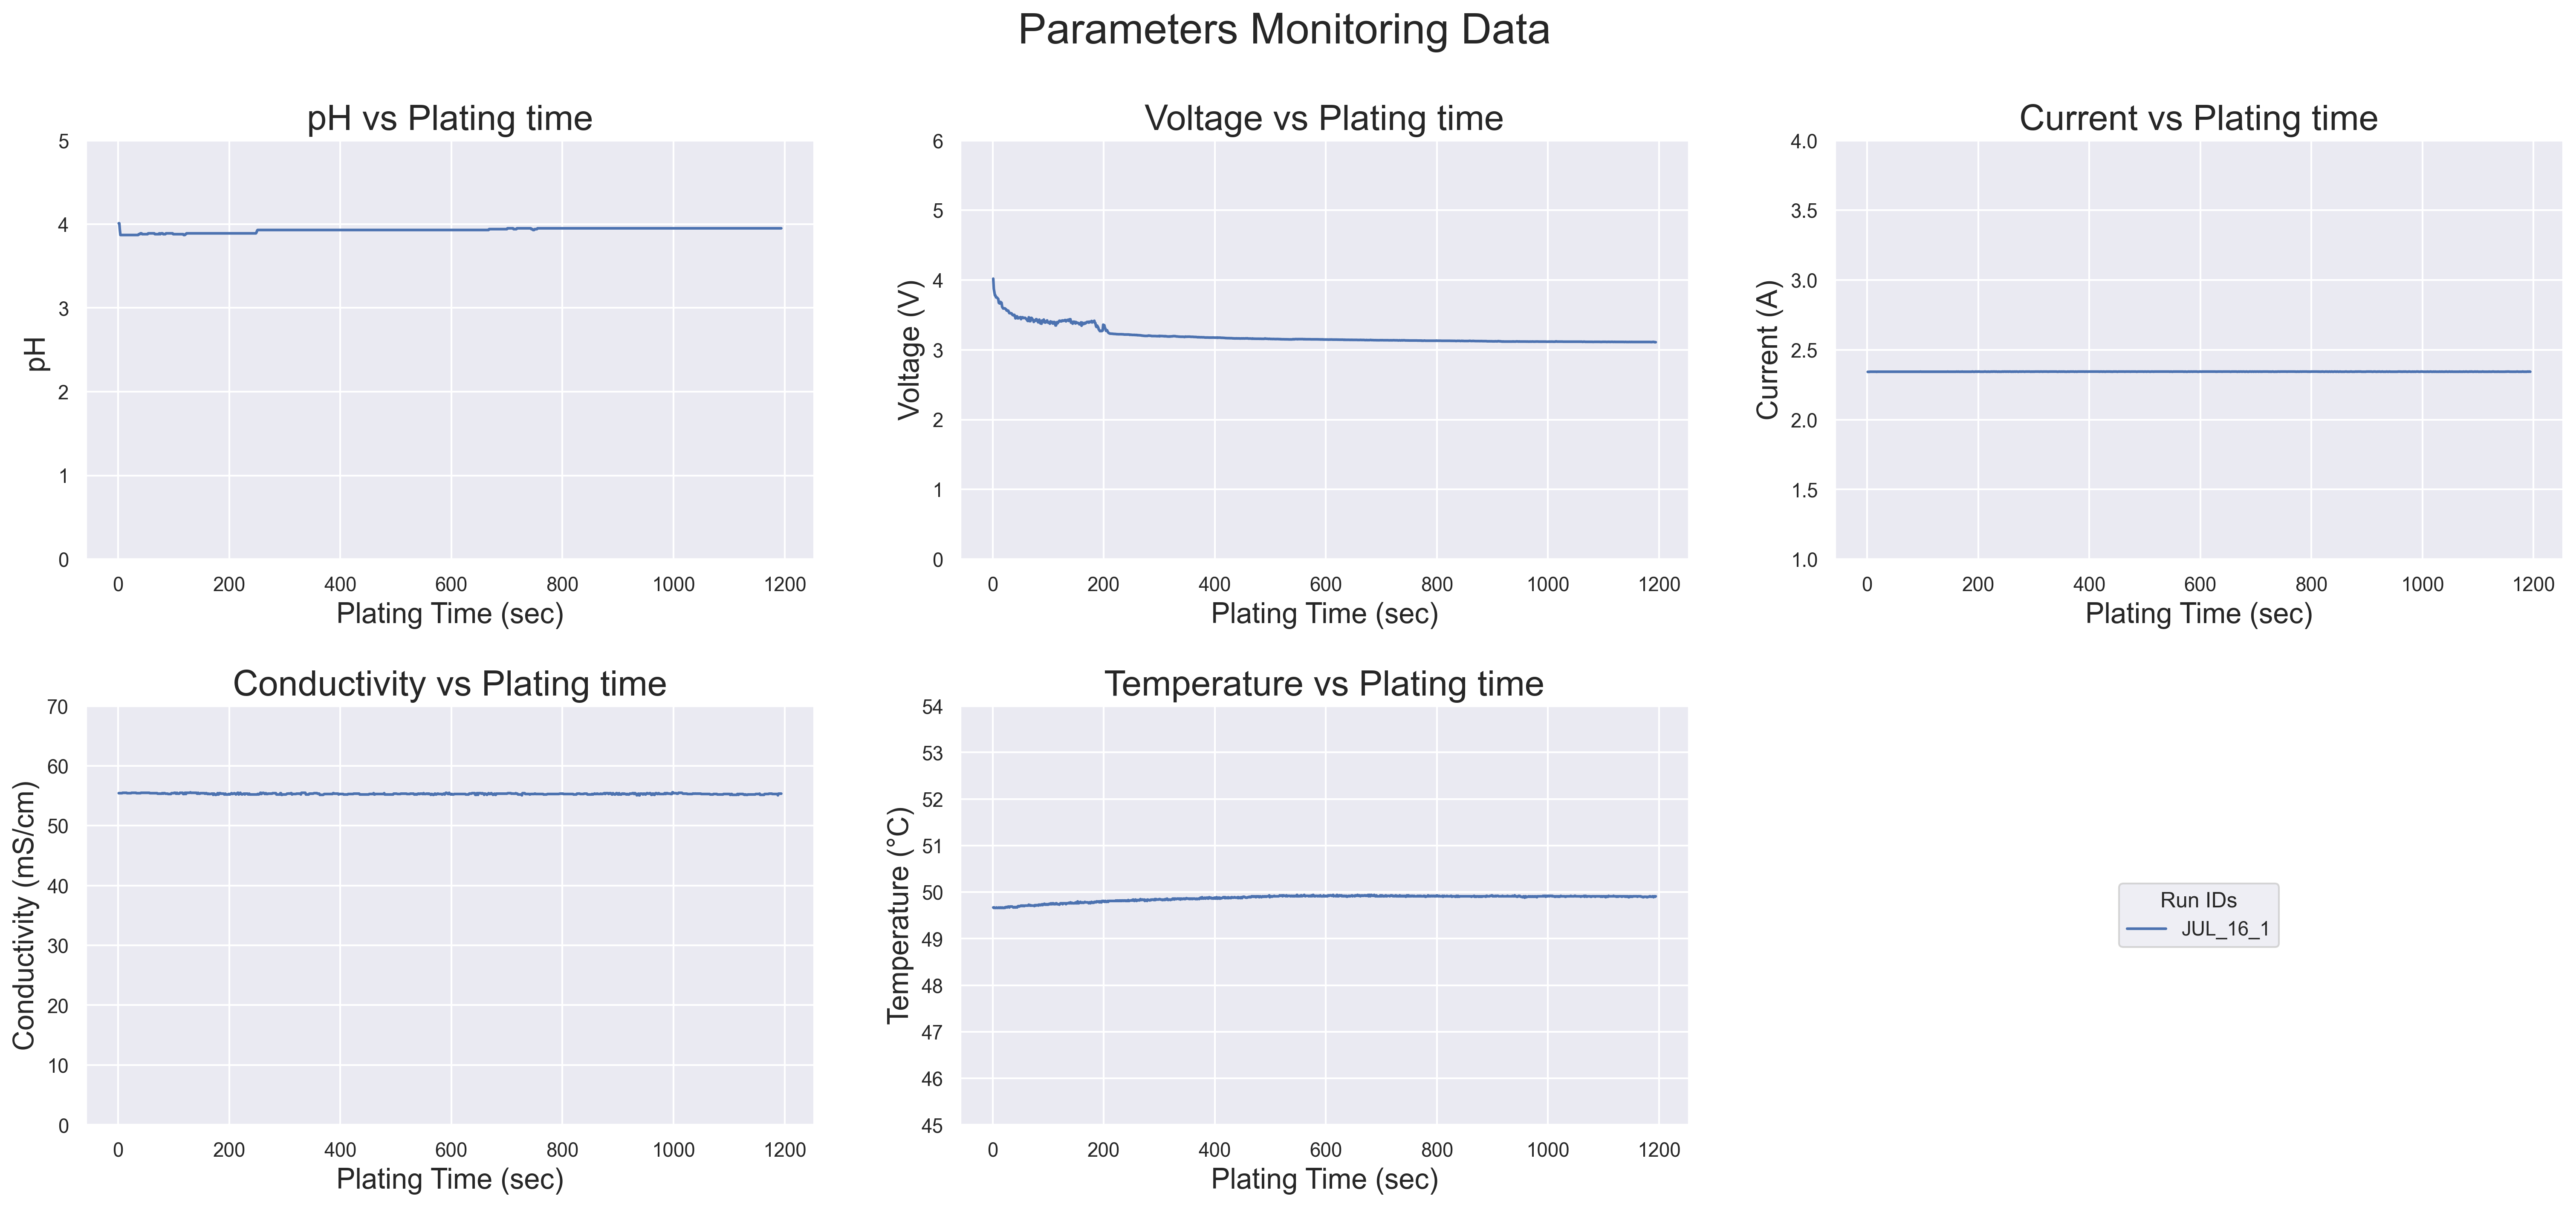

In [29]:
# Run This for every individual runs
save_individual_run(combined_df, PARAMS)

In [ ]:
# Run This to plot each baths
full_bath_condition = (combined_df['bath_id'] != 'Fresh')
bath_number = combined_df[full_bath_condition]['bath_id'].unique()
save_bath(combined_df, bath_number, PARAMS)

  0%|          | 0/8 [00:00<?, ?File/s]

[status] monitoring_Bath_1.png was saved successfully at ./monitoring_data/baths/monitoring_Bath_1.png
[status] monitoring_Bath_2.png was saved successfully at ./monitoring_data/baths/monitoring_Bath_2.png
[status] monitoring_Bath_3.png was saved successfully at ./monitoring_data/baths/monitoring_Bath_3.png
[status] monitoring_Bath_4.png was saved successfully at ./monitoring_data/baths/monitoring_Bath_4.png
[status] monitoring_Bath_5.png was saved successfully at ./monitoring_data/baths/monitoring_Bath_5.png
[status] monitoring_Bath_6.png was saved successfully at ./monitoring_data/baths/monitoring_Bath_6.png
[status] monitoring_Bath_7.png was saved successfully at ./monitoring_data/baths/monitoring_Bath_7.png
[status] monitoring_Bath_8.png was saved successfully at ./monitoring_data/baths/monitoring_Bath_8.png
[Save Completed >_<]


##
---

In [ ]:
specific_condition = combined_df['bath_id'] == 'Bath_3'
bath_number = combined_df[specific_condition]['run_id'].unique()
bath_number

array(['JUL_22_1', 'JUL_22_2', 'JUL_22_3', 'JUL_22_4', 'JUL_22_5',
       'JUL_22_6', 'JUL_22_7', 'JUL_22_8', 'JUL_22_9', 'JUL_23_1',
       'JUL_23_2', 'JUL_23_3', 'JUL_23_4', 'JUL_23_5', 'JUL_24_1',
       'JUL_24_2', 'JUL_24_3', 'JUL_24_4', 'JUL_24_5', 'JUL_24_6',
       'JUL_24_7', 'JUL_24_8', 'JUL_24_9', 'JUL_24_10'], dtype=object)

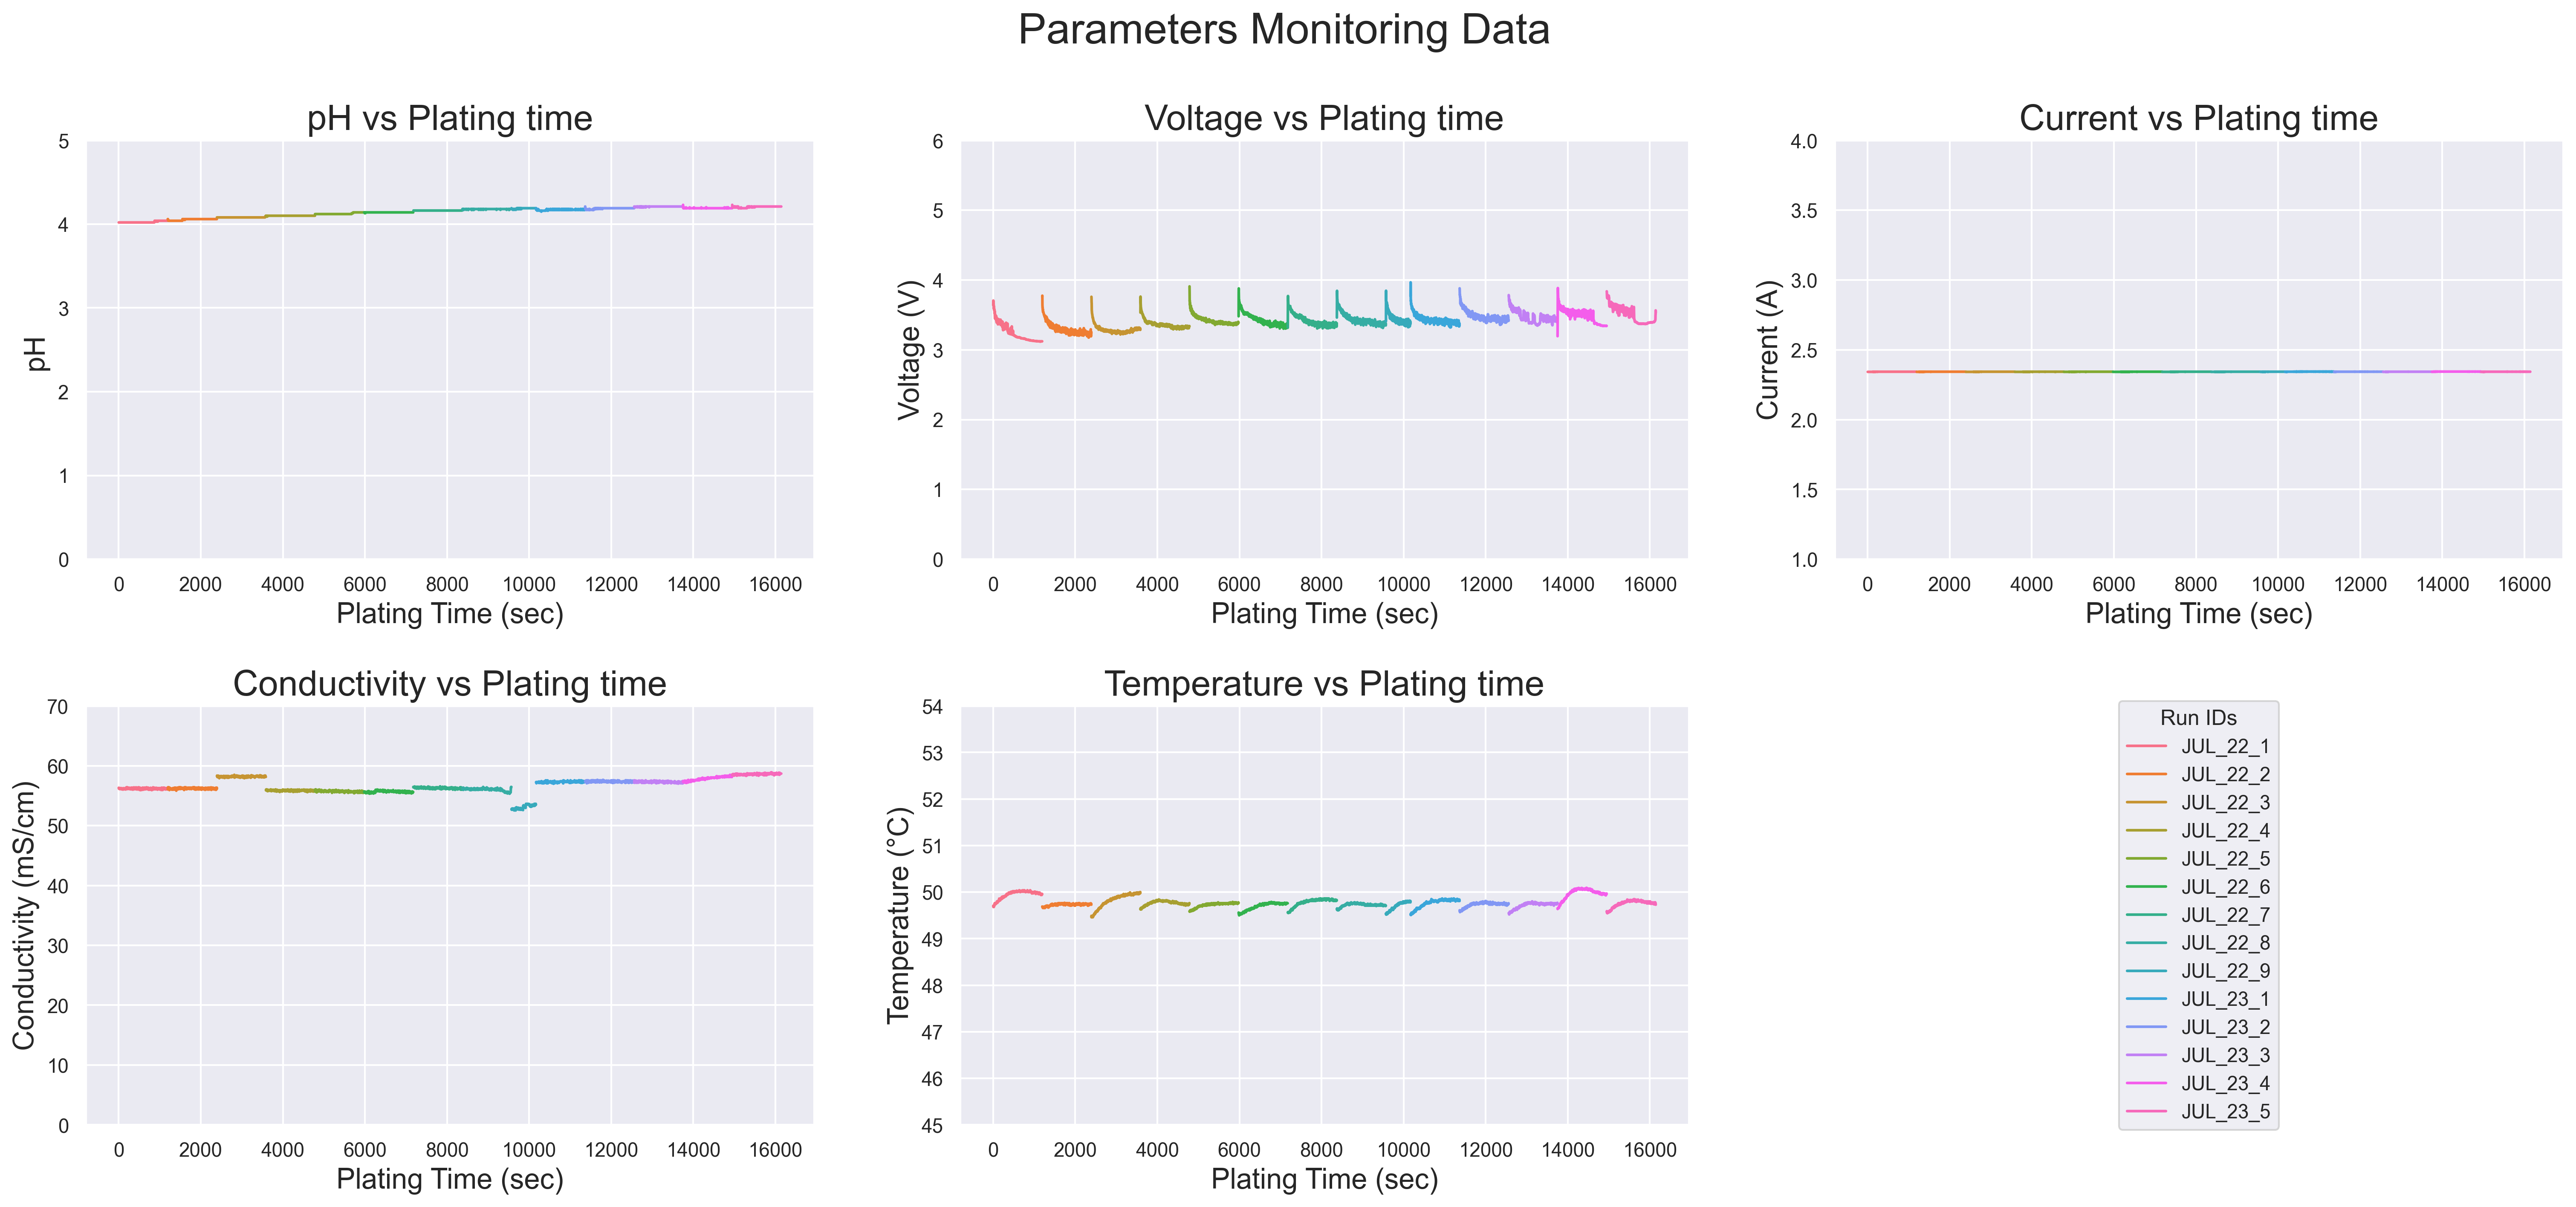

In [ ]:
# Ping request

specific_bath = ['JUL_22_1', 'JUL_22_2', 'JUL_22_3', 'JUL_22_4', 'JUL_22_5', 'JUL_22_6', 'JUL_22_7', 'JUL_22_8', 'JUL_22_9', 'JUL_23_1', 'JUL_23_2', 'JUL_23_3', 'JUL_23_4', 'JUL_23_5']

plot_all_params(internal_df, specific_bath, PARAMS)

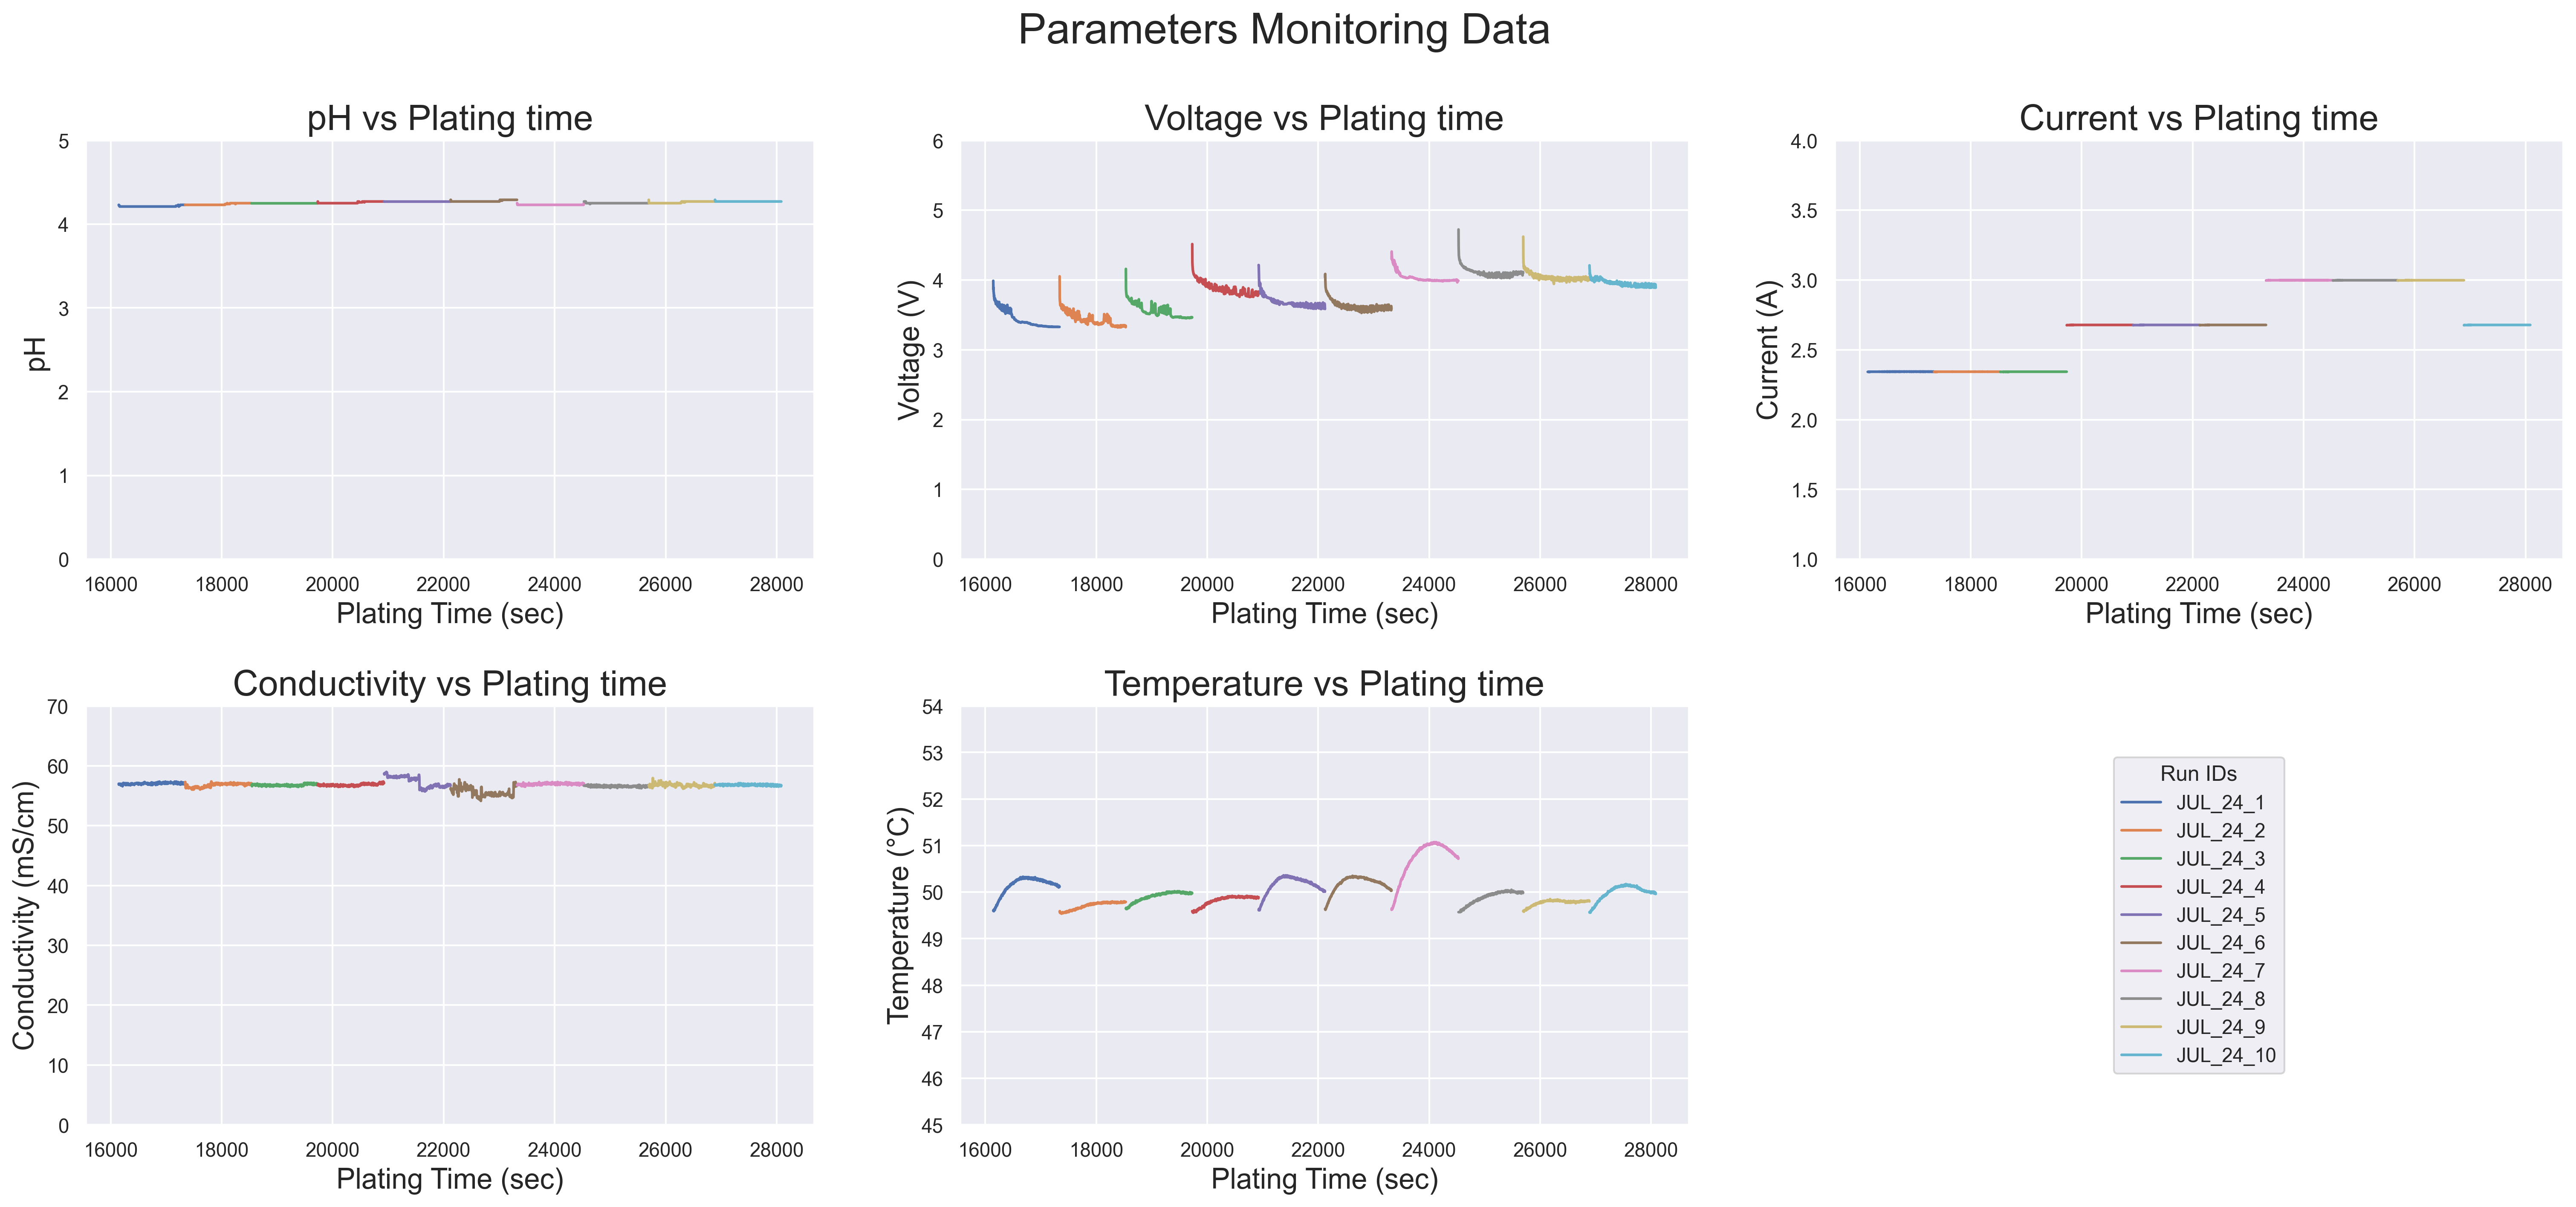

In [ ]:
# Other ping request
other_specific_bath = ['JUL_24_1', 'JUL_24_2', 'JUL_24_3', 'JUL_24_4', 'JUL_24_5', 'JUL_24_6', 'JUL_24_7', 'JUL_24_8', 'JUL_24_9', 'JUL_24_10']
plot_all_params(internal_df, other_specific_bath, PARAMS)

In [ ]:
# import seaborn as sns

# # sns.histplot(data = internal_df['deposition_rate'])
# sns.histplot(internal_df['deposition_rate'].unique(), bins=55)